# Исследование объявлений о продаже квартир


<h2>Цель исследования:</h2>

>Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

<h2>Описание данных:</h2>

Представленный датасет объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет включает следующие колонки:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении
 
<h2>План работ:</h2>

- Изучение предоставленного датасета 
- Предобработка данных из датасета 
- Исследовательский анализ данных


# Изучение датасета

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 


In [49]:
#Переменная для просмотра данных
try:
    estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    estate_data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [50]:
#Первые 5 стрчоек для проверки корректности отображения датасета 
display(estate_data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [51]:
#просмотр общей информации о датасете
print(estate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [52]:
#Кол-во строчек в датасере 
print('\nКоличество строчек в датасете всего:', len(estate_data))


Количество строчек в датасете всего: 23699


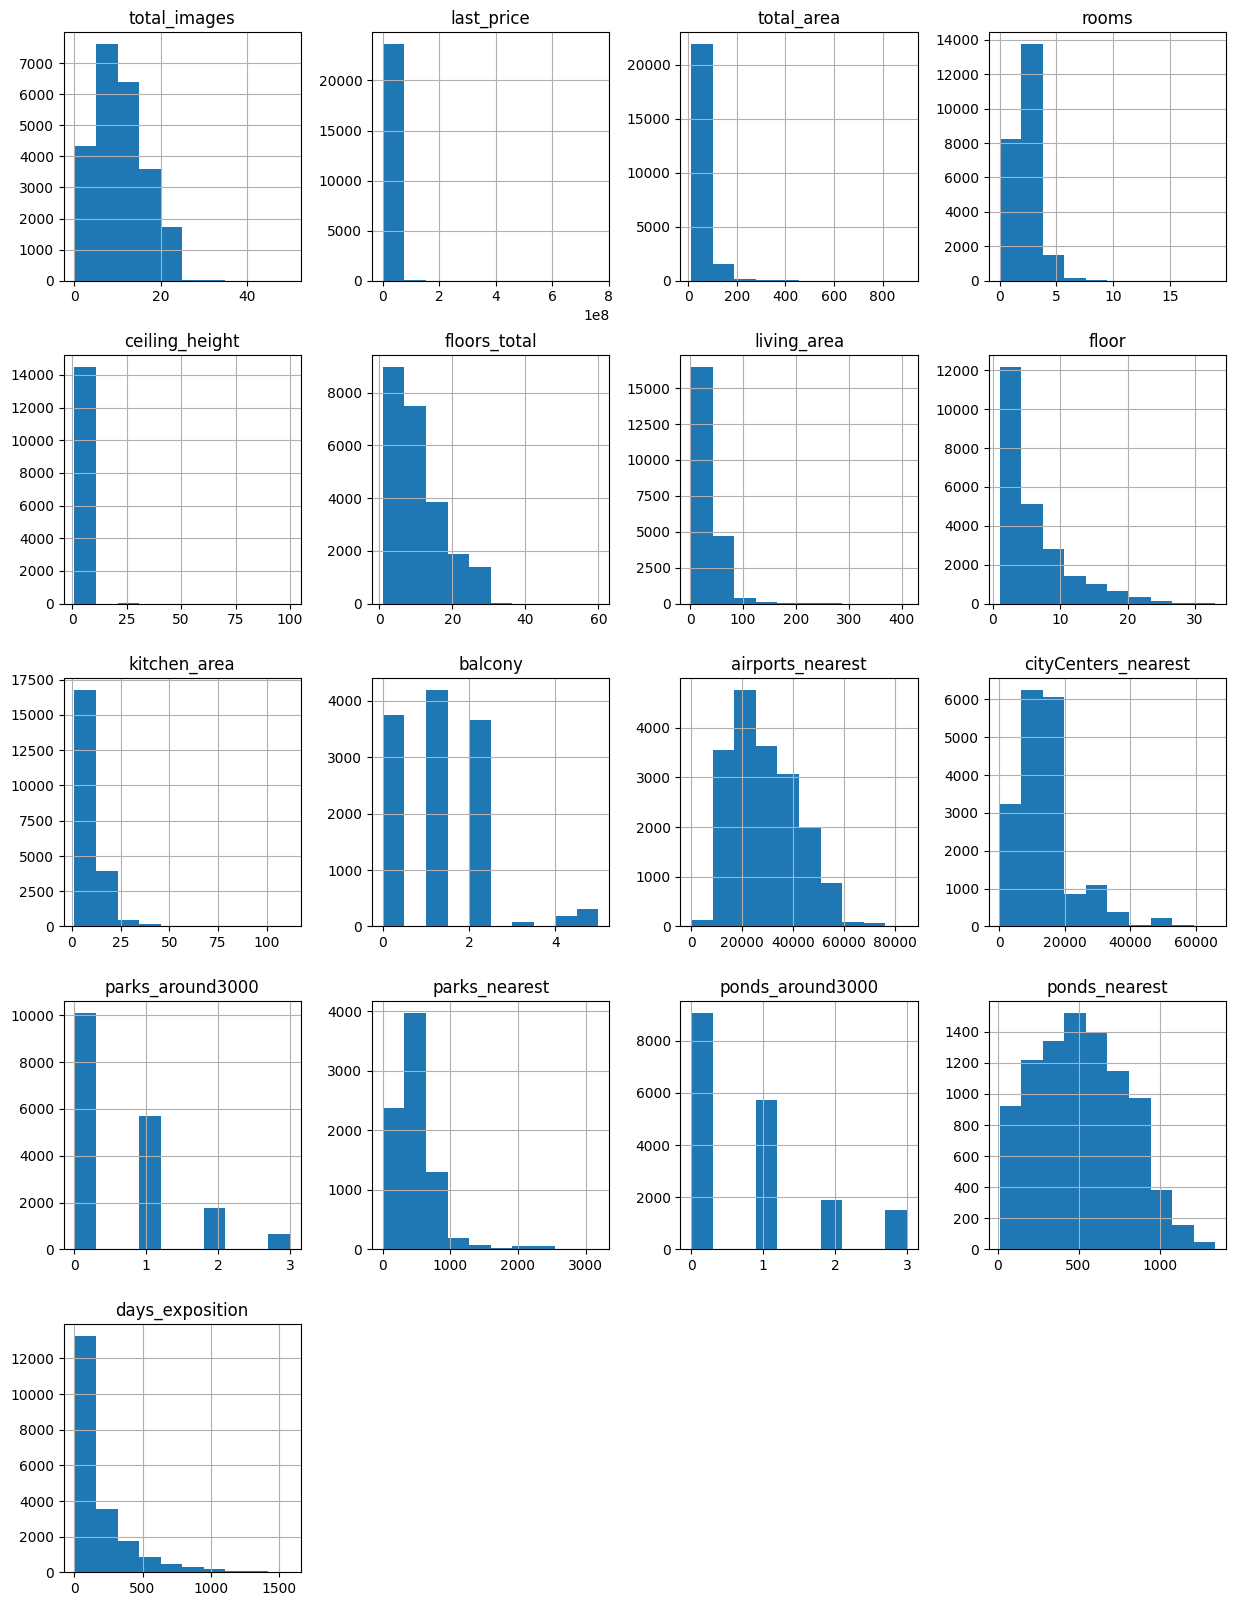

In [53]:
#Построение гистограм для визуальной оценки данных
estate_data.hist(figsize=(15, 20))
plt.show() #для устранения вывода массива с названиями гистрограмм

**Вывод:** В датасете всего 23699 строчек. Колонок - 22. Присутствуют булевые, строчные, дробные и целочисленные значения. При первичном просмотре информации о датасете было выявлено большое количество пропусков в данных, которые необходимо заполнить для дальнейшего анализа. При построении первичных гистрограмм видно, что данные нуждаются в более точной группировке по диапазону значений и очистке от вбросов.

# Предобработка данных

In [54]:
#Количество пропущенных значений в каждом столбце
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [55]:
#Кол-во пропусков в процентах
pd.DataFrame(round(estate_data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Отсутствующие значения в колонках floors_total и locality_name считаю нужным удалить т.к. их влияние на весь датасет невилико, ввиду малых значений. К тому же, восстановить значения в колонке locality_name невозможно  без исходных данных о квартире, т.к. это адрес её нахождения. Остальные пропуски будут заполнены медианными значениями.

In [56]:
#провекра на присутствие пропусков (дополнительная)
print(estate_data['floors_total'].isna().sum())
print(estate_data['locality_name'].isna().sum())

#Удаление строчек с пропусками
estate_data = estate_data.dropna(subset = ['floors_total'])
estate_data = estate_data.dropna(subset = ['locality_name'])

#провекра удаление пропусков в датасете
print(estate_data['floors_total'].isna().sum())
print(estate_data['locality_name'].isna().sum())


86
49
0
0


Заменим пустые значения в столбце is_apartment на False, т.к. восстановить информацию о том является ли квартира аппаратментами или нет без первоисточника практически невозможно.

In [57]:
#Замена значений в колонке 'is_apartment' на False
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(value = False)

#провекра на присутствие пропусков 
print(estate_data['is_apartment'].isna().sum())

0


Выставим значение 0 во все пустые строчки в колонке 'balcony'.

In [58]:
#Заполним значения nan в столбце 'balcony' на 0 (нет балконов)
estate_data['balcony'] = estate_data['balcony'].fillna(value = 0)

#провекра на присутствие пропусков 
print(estate_data['balcony'].isna().sum())

0


In [59]:
warnings.filterwarnings('ignore')

#заменим значения в нижеуказанных колонка на медианной значение по каждой группе
#На группы в зависимости от кол-ва комнат
to_change_columns = ['ceiling_height', 'living_area', 'kitchen_area',
                    'airports_nearest', 'parks_around3000', 
                    'parks_nearest', 'cityCenters_nearest',
                    'ponds_around3000', 'ponds_nearest']


for i in estate_data['rooms'].unique():
    for x in to_change_columns:
        estate_data.loc[(estate_data['rooms'] == i) & (estate_data[x].isna()), x] = \
        estate_data.loc[(estate_data['rooms'] == i), x].median()


In [60]:
#Кол-во квартир по группам
estate_data.groupby('rooms').count()

,total_images,last_price,total_area,first_day_exposition,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
rooms,,,,,,,,,,,,,,,,,,,,,
0,194,194,194,194,194,194,194,194,194,194,...,0,194,194,194,194,194,194,194,194,180
1,8004,8004,8004,8004,8004,8004,8004,8004,8004,8004,...,8004,8004,8004,8004,8004,8004,8004,8004,8004,7235
2,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,...,7897,7897,7897,7897,7897,7897,7897,7897,7897,6871
3,5779,5779,5779,5779,5779,5779,5779,5779,5779,5779,...,5779,5779,5779,5779,5779,5779,5779,5779,5779,4787
4,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,...,1172,1172,1172,1172,1172,1172,1172,1172,1172,933
5,325,325,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,251
6,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,76
7,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,37
8,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,11


Т.к. для квартир со свободной планировкой полностью отсутствуют данные по колонке kitchen_area, то решено заполнить их медианным значением для квартир с 1 комнатой.

In [61]:
estate_data.loc[(estate_data['rooms'] == 0) & (estate_data['kitchen_area'].isna()),'kitchen_area'] = \
estate_data.loc[(estate_data['rooms'] == 1), 'kitchen_area'].median()

In [62]:
#по такому же принцепу заполнятся значения для 19, 15, 14, 12 группы

estate_data.loc[(estate_data['rooms'] == 19) & (estate_data['parks_nearest'].isna()),'parks_nearest'] = \
estate_data.loc[(estate_data['rooms'] == 14), 'parks_nearest'].mean()

estate_data.loc[(estate_data['rooms'] == 19) & (estate_data['ceiling_height'].isna()),'ceiling_height'] = \
estate_data.loc[(estate_data['rooms'] == 14), 'ceiling_height'].mean()

estate_data.loc[(estate_data['rooms'] == 15) & (estate_data['ponds_nearest'].isna()),'ponds_nearest'] = \
estate_data.loc[(estate_data['rooms'] == 14), 'ceiling_height'].mean()

estate_data.loc[(estate_data['rooms'] == 16) & (estate_data['ponds_nearest'].isna()),'ponds_nearest'] = \
estate_data.loc[(estate_data['rooms'] == 14), 'ponds_nearest'].mean()


estate_data.loc[(estate_data['rooms'] == 12) & (estate_data['parks_nearest'].isna()),'parks_nearest'] = \
estate_data.loc[(estate_data['rooms'] == 14), 'ponds_nearest'].mean()



При более углубленном анализе указанного датасета квартиры с количеством комнат больше 8 целесообразно удалить, т.к. их количество относительно всего датасета минимально и сделать какой либо вывод по данным группам квартир будет ошибочно.

In [63]:
#Проверка на отсутствие пустных значений
estate_data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

In [64]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Далее необходимо перевести тип данных в более подходящий формат.

In [65]:
#перевод из float в int
to_change_type  = ['floors_total', 'balcony', 'airports_nearest', 'parks_around3000', 
                    'parks_nearest', 'cityCenters_nearest',
                    'ponds_around3000', 'ponds_nearest', 'last_price']

for x in to_change_type:
    estate_data[x] = estate_data[x].astype(int)


In [66]:
#проверка на корректность замены типа данных
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int32  
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int32  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int32  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [67]:
#Необходимо привести формат времени в столбце first_day_exposition в более читабельный вид
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M')

print(estate_data['first_day_exposition'].head(5))

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [68]:
#Поиск неявных дубликатов
print(estate_data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [69]:
#замена слова 'поселок' на 'посёлок'
estate_data['locality_name'] = estate_data['locality_name'].str.replace('e', 'е')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('поселок', 'посёлок')

#замена неявных дубликатов путем престроения записи населенных пунктов
estate_data['locality_name'] = estate_data['locality_name'].str.replace('посёлок ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('городской посёлок ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('деревня ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('посёлок городского типа ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('деревня ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('городского типа ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('коттеджный ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('садовое товарищество ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('станции ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('село ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('при железнодорожной ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('городской ', '')
estate_data['locality_name'] = estate_data['locality_name'].str.replace('село Копорье', 'Копорье')


In [70]:
estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [71]:
#Кол-во дупликатов в датасете 
estate_data.duplicated().sum()

0

In [72]:
#Поиск аномальных значений 

to_find_anomaly  = ['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 
                 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',          
                 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000' ,
                 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

for x in to_find_anomaly:
    print('Уникальные значения для столбца', x, estate_data[x].unique(), '\n')


Уникальные значения для столбца total_images [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37] 

Уникальные значения для столбца last_price [13000000  3350000  5196000 ...  6151120 21400000 11475000] 

Уникальные значения для столбца total_area [108.    40.4   56.   ...  66.86 133.81  76.75] 

Уникальные значения для столбца first_day_exposition ['2019-03-07T00:00:00.000000000' '2018-12-04T00:00:00.000000000'
 '2015-08-20T00:00:00.000000000' ... '2014-12-29T00:00:00.000000000'
 '2016-09-12T00:00:00.000000000' '2015-07-19T00:00:00.000000000'] 

Уникальные значения для столбца rooms [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12] 

Уникальные значения для столбца ceiling_height [  2.7    2.64   2.6    2.65   3.03   2.5    2.67   2.56   3.05   2.75
   2.8    2.9    2.55   3.1    3.     3.2    2.61   3.25   3.45   2.77
   2.85   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   2.34   3.4    3.06   2.72  

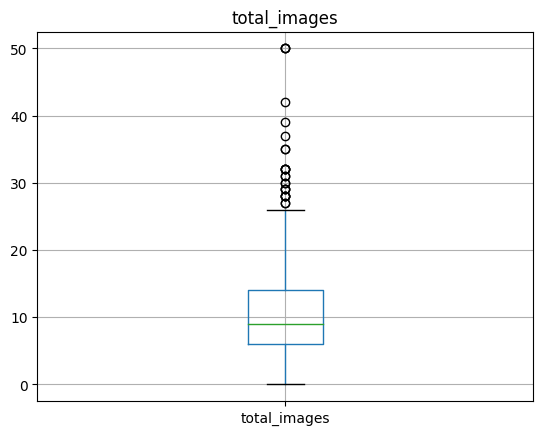

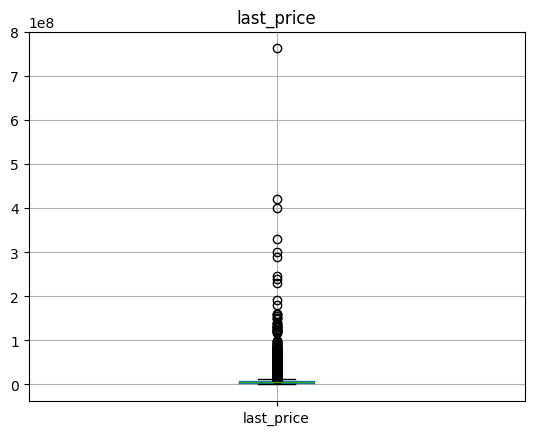

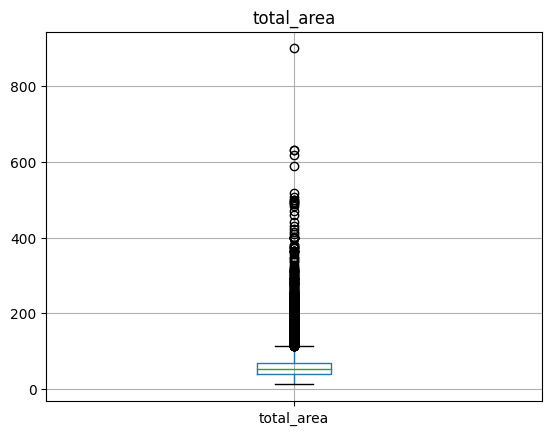

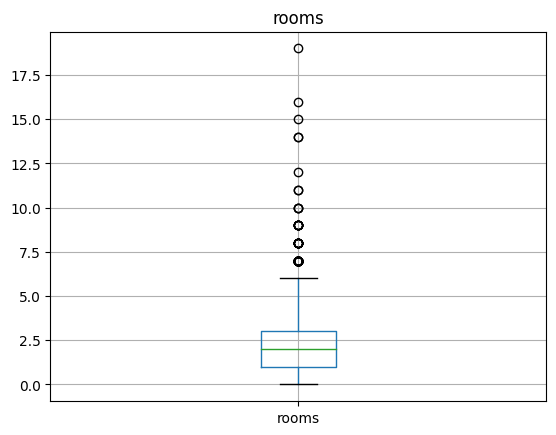

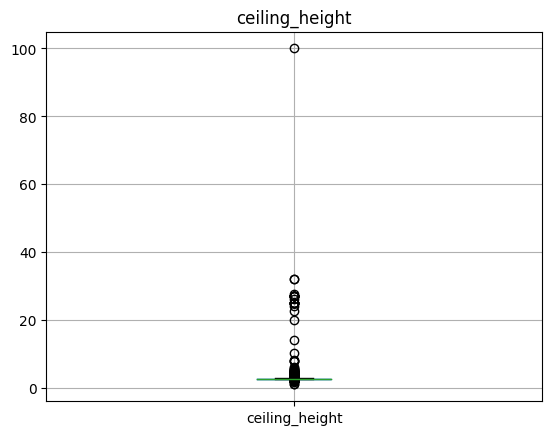

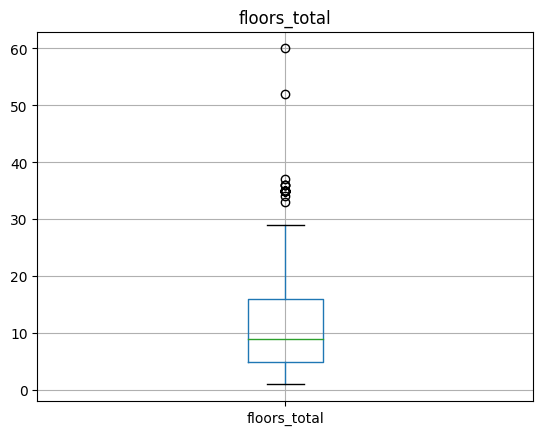

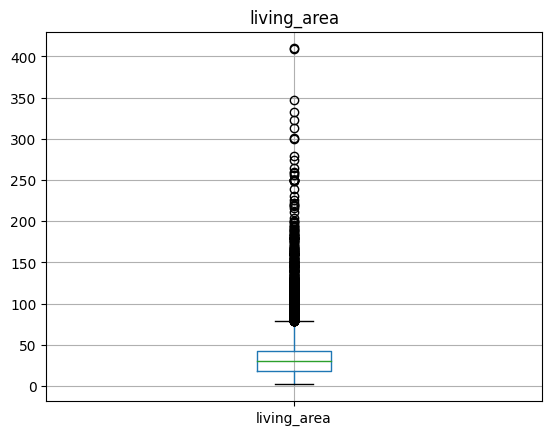

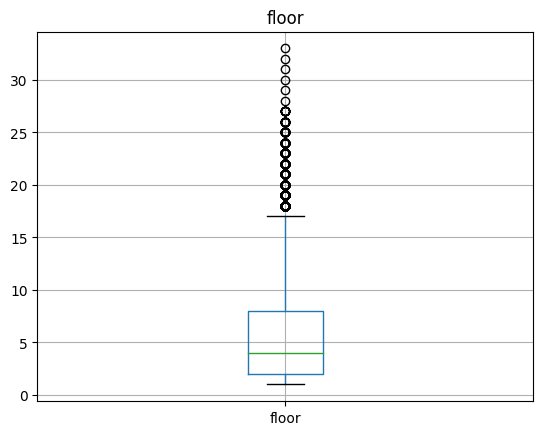

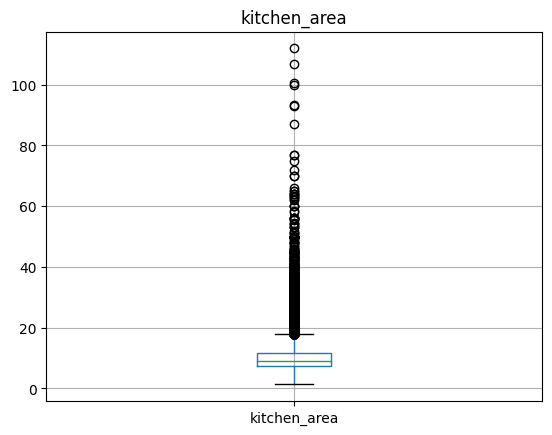

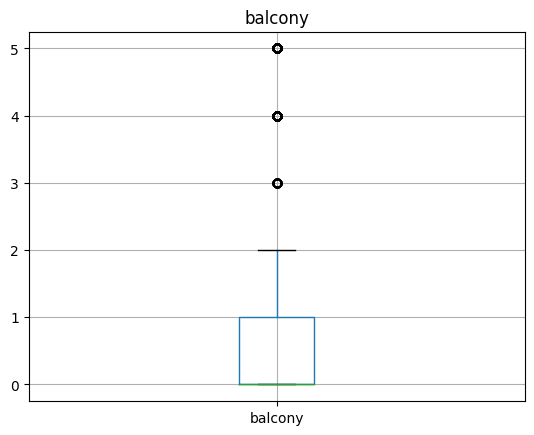

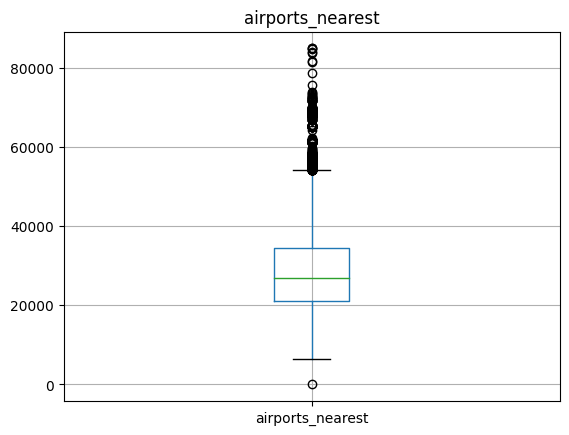

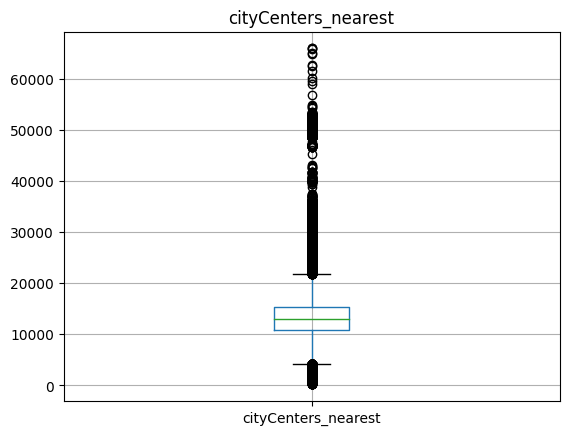

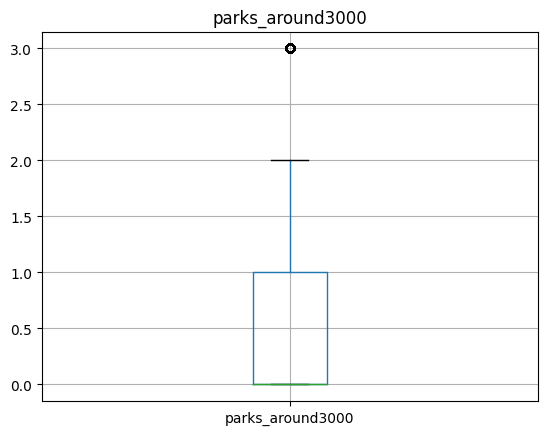

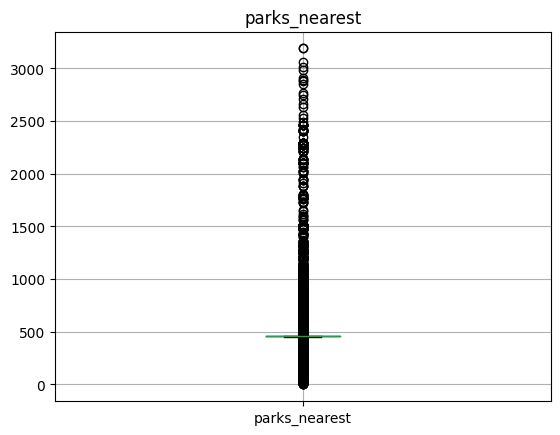

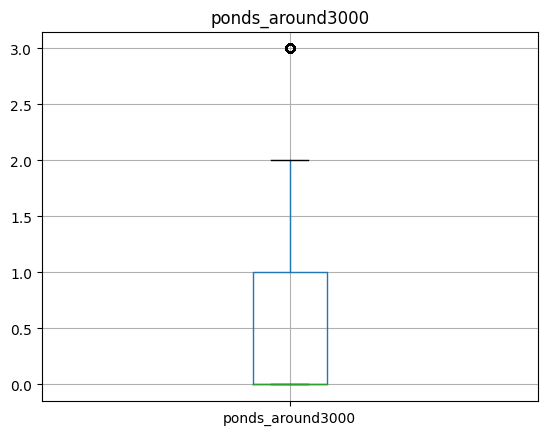

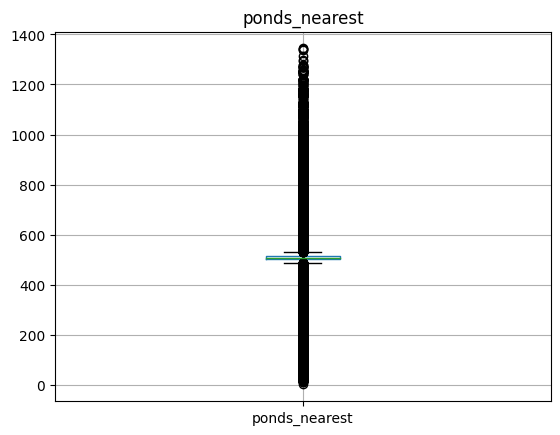

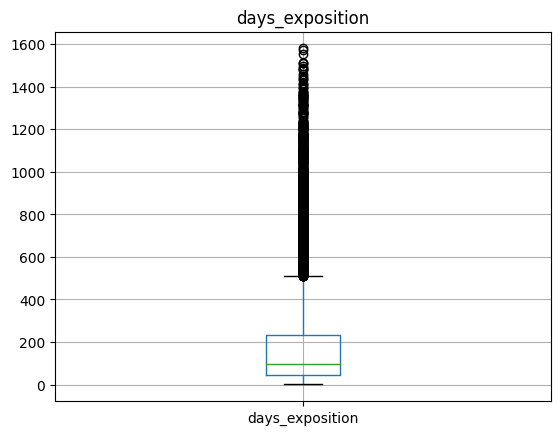

In [73]:
#Поиск аномальных значений 

to_find_anomaly  = ['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 
                 'floors_total', 'living_area', 'floor',          
                 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000' ,
                 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

for x in to_find_anomaly:
    estate_data.boxplot(x)
    plt.title(x)
    plt.show()


Обнаружены аномалии в данных высоты пололка и площади кухни.

[  2.7    2.64   2.6    2.65   3.03   2.5    2.67   2.56   3.05   2.75
   2.8    2.9    2.55   3.1    3.     3.2    2.61   3.25   3.45   2.77
   2.85   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.38   3.13   3.8    3.15   3.42   3.55   3.16   3.62   3.12
   2.53   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94
   3.82   3.54   3.53   2.83   4.7    2.4    3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45

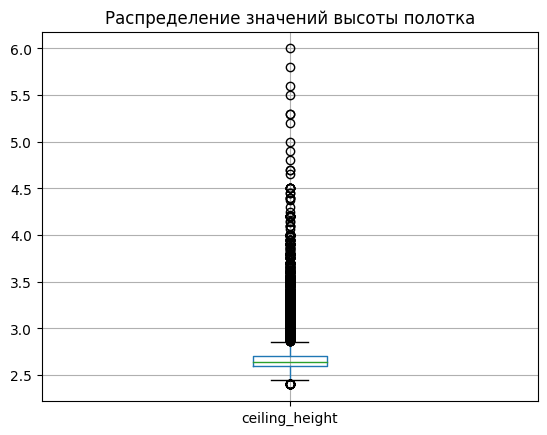

In [74]:
print(estate_data['ceiling_height'].unique()) 

print(len(estate_data['ceiling_height']))

#минимальной нормой высоты потолка в России считается 2,4 метра. Для квартир высокого класса уровень потолкво может
#достигать 4 метров и более
#Считаю что необходимо ограничить диапазон потолков в датасете от 2.4 до 6 метров. Остальное считать аномалиями.

estate_data = estate_data.loc[(estate_data['ceiling_height'] >= 2.4) & (estate_data['ceiling_height'] <= 6.0)]
    
#Итоговая длина датасета после удаления пустых значений
print(len(estate_data['ceiling_height']))

estate_data.boxplot('ceiling_height')
plt.title('Распределение значений высоты полотка')
plt.show()


[25.   11.    8.3   9.5  41.    9.1  14.4  18.9   8.81  6.5   8.5   6.
  9.    5.2   8.    7.6   5.6  12.    5.7   6.1  19.6  15.    7.    9.2
 11.7  13.4  17.    6.3   8.7  11.6   8.8  10.   17.6   7.5  50.   15.5
 10.7  11.1  20.   11.9  16.    5.3  11.5   7.2   6.2  10.4   7.1   7.3
 11.95 10.2   6.4   5.5  13.    8.4  23.6  10.8  18.3   5.    8.2  24.
 23.8   6.6  26.85 15.4   7.8  33.8   5.4  12.72 12.2  19.   12.4   7.9
 10.3   9.8  17.5  14.7  20.91 21.3  10.6  10.9   9.7   7.7  12.5  11.4
  8.6  11.24 14.1  15.7  13.29 14.   12.9  12.7  16.5   9.36 21.5  35.
 10.5  19.3  21.4  40.   49.2  11.52  8.9   9.6  30.   14.2   8.1  10.44
 16.3  11.2  18.4   7.4  11.3   9.4  13.1  10.19  7.06 22.   36.    5.1
 18.7   9.9  14.3  18.   23.   19.4  11.8  13.3  17.7  23.1  21.1  11.33
 13.5  19.5  13.2  17.2  77.   13.8  12.3   9.3   5.8  26.1  12.88  9.28
 16.1  14.5  31.    5.9  10.1  23.4  16.2  19.2  28.6  15.1  26.4   8.98
 10.59 17.9  11.27 16.74  9.57 23.43 15.2   8.07 12.24 13.39 36

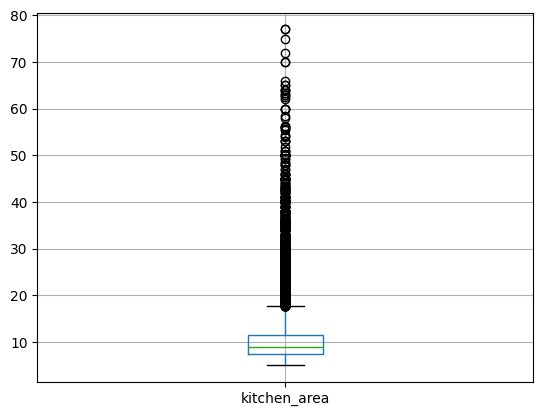

In [75]:
#площадь кухни для 1-комнатной квартиры должна составлять не менее 5 кв. метров. 
# Значит все значения ниже 5 можно срезать как аномалии

estate_data = estate_data.loc[(estate_data['kitchen_area'] >= 5) &(estate_data['kitchen_area'] <= 80)]

print(estate_data['kitchen_area'].unique()) 
print(len(estate_data['kitchen_area']))


estate_data.boxplot('kitchen_area')
plt.show()

**Вывод:** Количество строчек в датасете сократилось до 23406. Во время предобработки были обнаружены пропуски в различных столбцах. Все отсутствующие числовые значения были заменены на медианное значение в зависимости от своей группы. Булевые значения были заменены на False. Строчки с отсутствующими строчными данными были удалены из датасета.  Были заменены типы данных с дробных на целочисленные для удобства дальнейшего анализа. Удалены все неявные дубликаты в названии локаций.

# Исследовательский анализ данных

In [76]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23406 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23406 non-null  int64         
 1   last_price            23406 non-null  int32         
 2   total_area            23406 non-null  float64       
 3   first_day_exposition  23406 non-null  datetime64[ns]
 4   rooms                 23406 non-null  int64         
 5   ceiling_height        23406 non-null  float64       
 6   floors_total          23406 non-null  int32         
 7   living_area           23406 non-null  float64       
 8   floor                 23406 non-null  int64         
 9   is_apartment          23406 non-null  bool          
 10  studio                23406 non-null  bool          
 11  open_plan             23406 non-null  bool          
 12  kitchen_area          23406 non-null  float64       
 13  balcony         

Добавляе в таблицу новые столбци для последующего анализа

In [77]:
# цена 1 квадратного метра 
estate_data['price_for_area'] = round(estate_data['last_price']/estate_data['total_area'], 2) 
print(estate_data['price_for_area'].head(5))


0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_for_area, dtype: float64


In [78]:
# день публикации
estate_data['publication_day'] = estate_data['first_day_exposition'].dt.weekday
print(estate_data['publication_day'].head(5))

# месяц публикации
estate_data['publication_month'] = estate_data['first_day_exposition'].dt.month
print(estate_data['publication_month'].head(5))

# год публикации
estate_data['publication_year'] = estate_data['first_day_exposition'].dt.year
print(estate_data['publication_year'].head(5))



0    3
1    1
2    3
3    4
4    1
Name: publication_day, dtype: int64
0     3
1    12
2     8
3     7
4     6
Name: publication_month, dtype: int64
0    2019
1    2018
2    2015
3    2015
4    2018
Name: publication_year, dtype: int64


In [79]:
def floor_type(row):
    """Функция для присвоения группы в зависимости от этажа квартиры"""
    floor = row['floor']
    total_floors = row['floors_total']
    if floor == 1:
        return "первый"
    if floor == total_floors:
        return "последний"
    else:
        return "другой"

In [80]:
#тип этажа
estate_data['type_floor'] = estate_data.apply(floor_type, axis = 1)
print(estate_data['type_floor'].head(5))

0    другой
1    первый
2    другой
3    другой
4    другой
Name: type_floor, dtype: object


In [81]:
#дистанция до центра города
estate_data['cityCenters_distant'] = estate_data['cityCenters_nearest']/1000
estate_data['cityCenters_distant'] = estate_data['cityCenters_distant'].astype(int)
print(estate_data['cityCenters_distant'].head(5))

0    16
1    18
2    13
3     6
4     8
Name: cityCenters_distant, dtype: int32


In [82]:

#дистанция до аэрапорта 
estate_data['airports_distant'] = estate_data['airports_nearest']/1000
estate_data['airports_distant'] = estate_data['airports_distant'].astype(int)
print(estate_data['airports_distant'].head(5))


0    18
1    12
2    21
3    28
4    31
Name: airports_distant, dtype: int32


In [83]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23406 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23406 non-null  int64         
 1   last_price            23406 non-null  int32         
 2   total_area            23406 non-null  float64       
 3   first_day_exposition  23406 non-null  datetime64[ns]
 4   rooms                 23406 non-null  int64         
 5   ceiling_height        23406 non-null  float64       
 6   floors_total          23406 non-null  int32         
 7   living_area           23406 non-null  float64       
 8   floor                 23406 non-null  int64         
 9   is_apartment          23406 non-null  bool          
 10  studio                23406 non-null  bool          
 11  open_plan             23406 non-null  bool          
 12  kitchen_area          23406 non-null  float64       
 13  balcony         

Для дальнейшего анализа были добавлены колонки, отображающие день, месяц и год публикации объявлений. Добавлена классификация по этажам и расстояние до центра города и аэрапорта.

**Вывод:** В исследуемых данных присутствует большое количество вбросов. При этом вбросы характерны для каждой группы исследуемых данных (по кол-ву комнат). Обобщая, можно сделать выводы что сравнивать все данные в датасете неимеет смысла, т.к. они все сильно разнятся и выборка данных не сбалансирована. Предлагаю сделать разделение по группам. группа 1 это квартиры с 0(свободная планировка), 1,2 и 3 комнатами. Группа 2 будет включать квартиры с 4, 5, 6 и 7 комнатами.
Остальные группы комнат не представляют интереса в виду их малого количества присутствия в датасете. Данное разделение поможет частично избавится от вбросовых данных, но полностью от них не избавит.

In [84]:
rooms_group_1 = estate_data.query('rooms in [0,1,2,3]')
rooms_group_2 = estate_data.query('rooms in [4,5,6,7]')

In [85]:
#Срез вбросовых данных по созданным группам
rooms_group_1 = rooms_group_1.query('total_area <= 100')
rooms_group_1 = rooms_group_1.query('living_area <= 70')
rooms_group_1 = rooms_group_1.query('kitchen_area <= 22 and kitchen_area >= 3')

Cрез по колонке last_price не целесообразен т.к. это отражение стоимости продажи квартиры. D дальнейшем данный показатель поможет выявить кореляцию между стоимостью и различными условиями квартиры

В показателях ceiling_height разброс между квантелями минимален, так же не велико и стандартное отклонения от медианы.
Вероятно, все вбросовые значения расположенные за линией распеределения являюстя исключениями (старый жилой фонд или 
элитное жилье где уровень потолков сильно отличается от стандарта)

Срез по колонке floor и floors_total  так же не целесообразен т.к. он всего лишь показывает на каком этаже находится квартира и сколько всего этажей в доме.
Срез показателей  'airport_distant','cityCenters_distant', 'parks_nearest','ponds_nearest' нецелесообразен т.к. потенциально это данные с которыми корелирует стоимость квартиры

In [86]:
rooms_group_2 = rooms_group_2.query('total_area <= 350')
rooms_group_2 = rooms_group_2.query('living_area <= 190 and living_area >= 40')
rooms_group_2 = rooms_group_2.query('kitchen_area <= 40')


Во второй группе были проведены срезы по площадям квартир, но не были проведены срезы по'airport_distant','cityCenters_distant', 'parks_nearest','ponds_nearest'
В дальнейшем данные занчения во всех группах можно будет срезать при исследовании кореляции данных между собой

4.1 Изучите параметров датасета.

In [87]:
def analys_group(dataset, row, bins = 6): 
    """Функция получает на вход столбец и проводит построение графиков"""
    data = dataset
    column = row
    bins = bins
    
    print('Статистическая информация о колонке', column, '\n')
    print(data[column].describe())
    print('\n')
    
  
    print('Оценка характеристики распределения колонки', column)
    data.boxplot(column)
    plt.show()
    print('\n')

    
    print('Оценка распределения по количеству в зависимости от колонки', column)
    data[column].hist(bins = bins)
    plt.show()

    print('-'*60 + '\n')


----------------------------Группа 1-------------------------------
Статистическая информация о колонке total_area 

count    20612.000000
mean        51.819281
std         16.716248
min         12.000000
25%         38.700000
50%         48.000000
75%         62.200000
max        100.000000
Name: total_area, dtype: float64


Оценка характеристики распределения колонки total_area


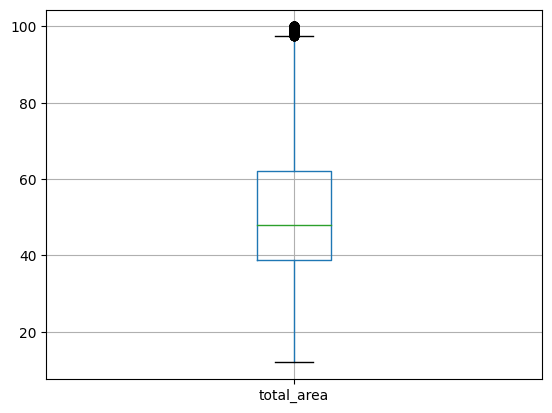



Оценка распределения по количеству в зависимости от колонки total_area


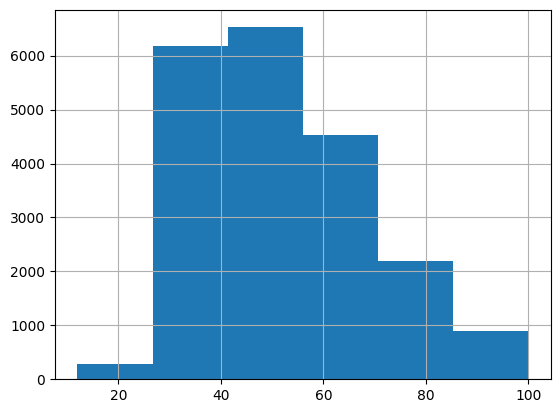

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке total_area 

count    1495.000000
mean      124.793786
std        48.923681
min        42.000000
25%        90.000000
50%       112.900000
75%       149.800000
max       342.000000
Name: total_area, dtype: float64


Оценка характеристики распределения колонки total_area


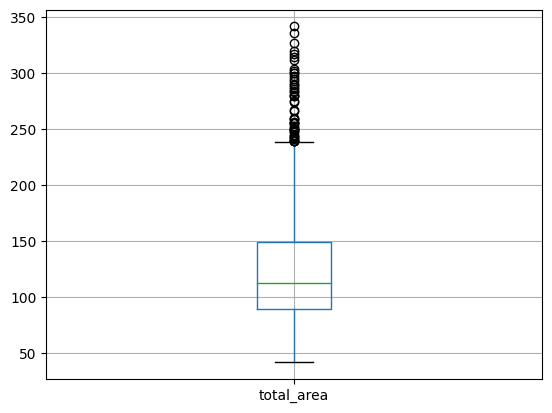



Оценка распределения по количеству в зависимости от колонки total_area


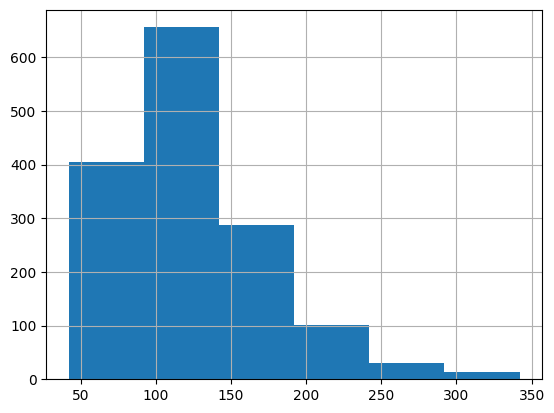

------------------------------------------------------------



In [88]:
#Исследование итоговой площади квартир
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'total_area')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'total_area')


**Вывод по total_area:** Выборка по группе 1 перевешывает выборку по группе 2 практически в 13 раз. Медианное значение площади квартиры для первой выборки составляет 48 квадратных метров. Так же у выборки 1 по сравнению с выборкой 2 минимальное количество аномальных/вбросовых данных.  Медианное значение площади квартиры для второй выборки составляет 112 квадратных метров. У второй выборки заметный сильный шлейф аномальных значений/вбросов за пределами нормы распределения.

----------------------------Группа 1-------------------------------
Статистическая информация о колонке living_area 

count    20612.000000
mean        29.391060
std         11.691059
min          2.000000
25%         18.000000
50%         29.000000
75%         38.000000
max         70.000000
Name: living_area, dtype: float64


Оценка характеристики распределения колонки living_area


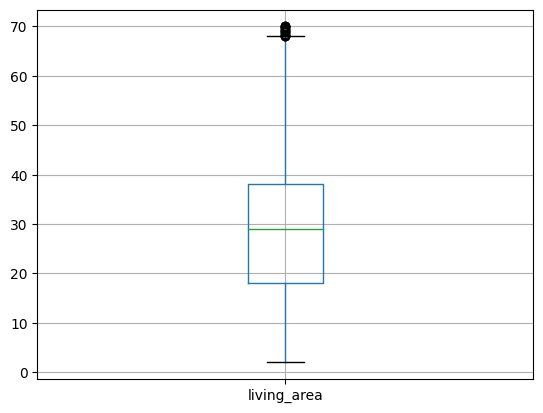



Оценка распределения по количеству в зависимости от колонки living_area


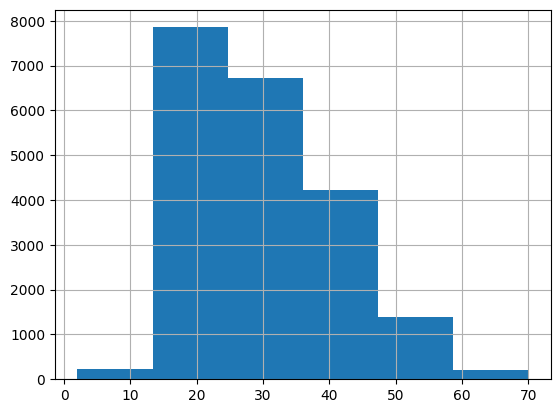

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке living_area 

count    1495.000000
mean       79.060963
std        28.840897
min        40.000000
25%        60.000000
50%        70.400000
75%        91.785000
max       190.000000
Name: living_area, dtype: float64


Оценка характеристики распределения колонки living_area


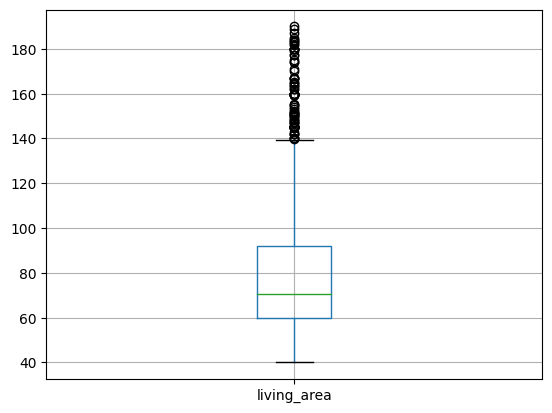



Оценка распределения по количеству в зависимости от колонки living_area


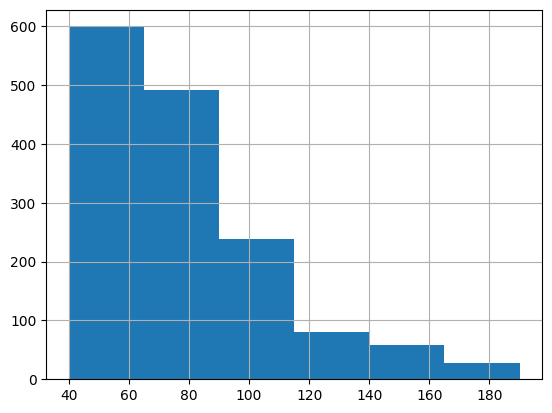

------------------------------------------------------------



In [89]:
#Исследование итоговой площади жилых комнат
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'living_area')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'living_area')


**Вывод по living_area:** Медианное значение жилой площади квартиры для первой выборки составляет 29 квадратных метров. Минимальное значение в 2 кв. метра относится к квартирам со свободной планировкой. Медианное значение площади квартиры для второй выборки составляет 70 квадратных метров.

----------------------------Группа 1-------------------------------
Статистическая информация о колонке kitchen_area 

count    20612.000000
mean         9.397366
std          3.004725
min          5.000000
25%          7.100000
50%          9.000000
75%         10.900000
max         22.000000
Name: kitchen_area, dtype: float64


Оценка характеристики распределения колонки kitchen_area


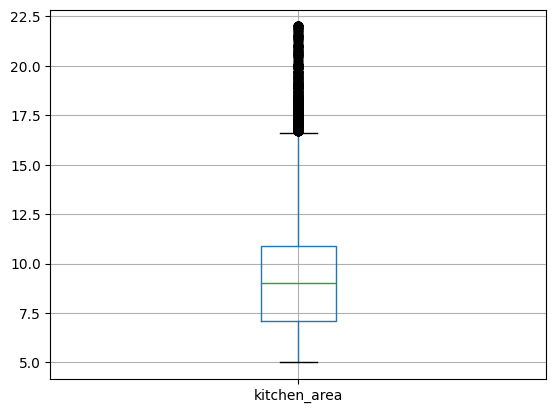



Оценка распределения по количеству в зависимости от колонки kitchen_area


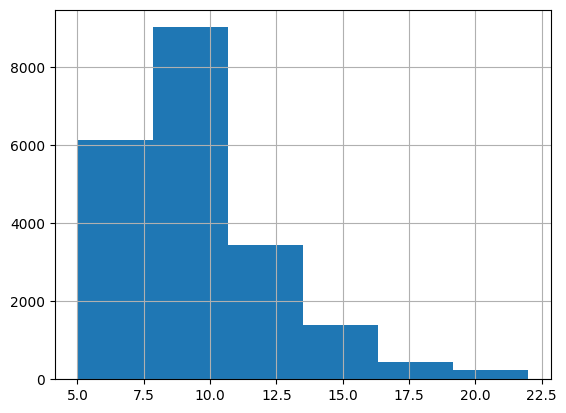

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке kitchen_area 

count    1495.000000
mean       14.278395
std         6.754253
min         5.000000
25%         9.900000
50%        12.200000
75%        17.000000
max        40.000000
Name: kitchen_area, dtype: float64


Оценка характеристики распределения колонки kitchen_area


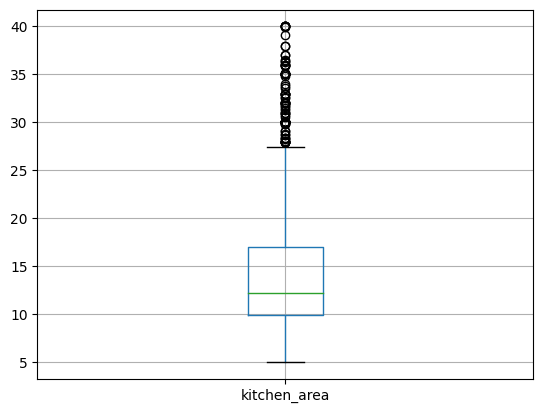



Оценка распределения по количеству в зависимости от колонки kitchen_area


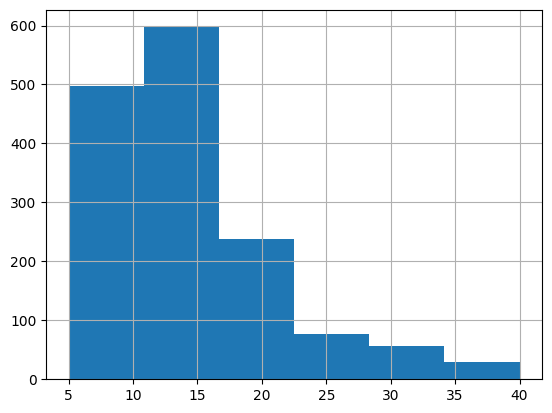

------------------------------------------------------------



In [90]:
#Исследование итоговой площади кухонь 
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'kitchen_area')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'kitchen_area')


**Вывод по living_area:** Медианное значение площади кухни для первой выборки составляет 9 квадратных метров. Медианное значение площади квартиры для второй выборки составляет 12 квадратных метров. Заметно близкое сходство по площади кухонь у выборки 1 и выборки 2. 

----------------------------Группа 1-------------------------------
Статистическая информация о колонке last_price 

count    2.061200e+04
mean     4.956610e+06
std      2.787472e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.390000e+06
75%      5.950000e+06
max      4.642407e+07
Name: last_price, dtype: float64


Оценка характеристики распределения колонки last_price


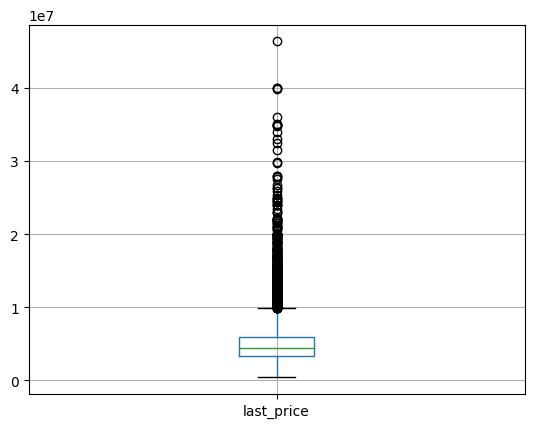



Оценка распределения по количеству в зависимости от колонки last_price


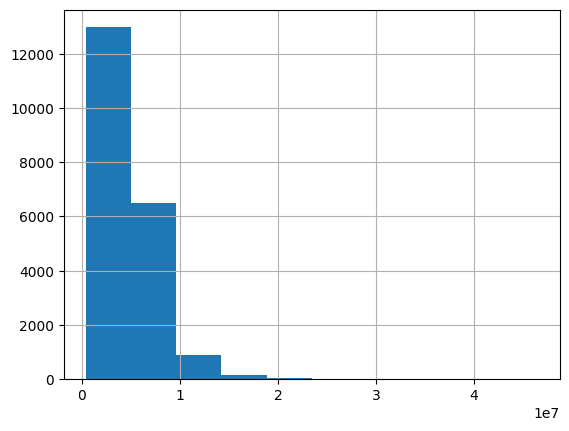

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке last_price 

count    1.495000e+03
mean     1.584272e+07
std      1.799174e+07
min      9.990000e+05
25%      7.400000e+06
50%      1.100000e+07
75%      1.700000e+07
max      2.450000e+08
Name: last_price, dtype: float64


Оценка характеристики распределения колонки last_price


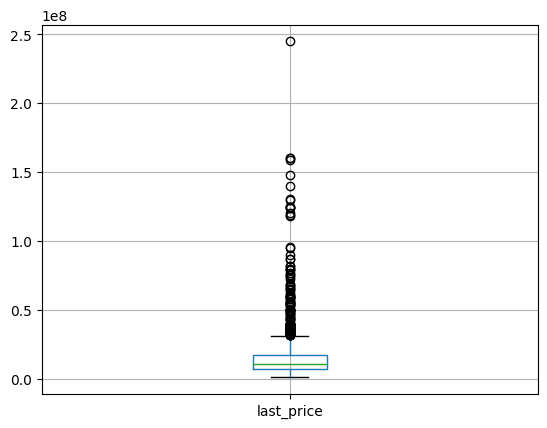



Оценка распределения по количеству в зависимости от колонки last_price


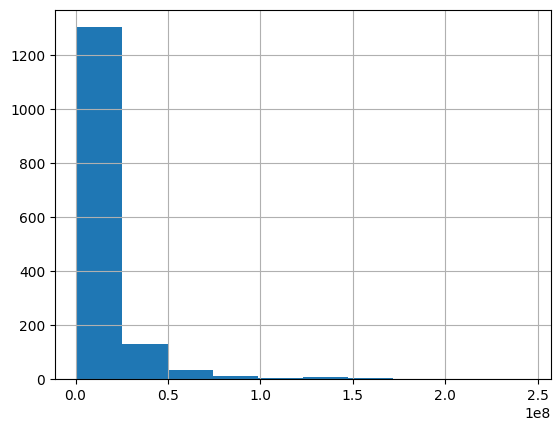

------------------------------------------------------------



In [91]:
#Исследование итоговой цены за квартиру 
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'last_price', 10)
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'last_price', 10)



**Вывод по last_price:** Медианное значение цены для первой выборки составляет 4,4 млн.  Медианное  значение цены квартиры для второй выборки составляет 11 млн. В двух группах сразу видно различие в цене. При этом медианное значение для 2 группы практически в 3 раза больше чем для 1-ой группы. Так же на графиках распределения заметно, что для всех выборок наблюдается сильный шлейф аномальных/вбросовых значений. Данной утверждение также можно пронаюлюдать на гистограммах распределения.

----------------------------Группа 1-------------------------------
Статистическая информация о колонке rooms 

count    20612.000000
mean         1.839802
std          0.796901
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: rooms, dtype: float64


Оценка характеристики распределения колонки rooms


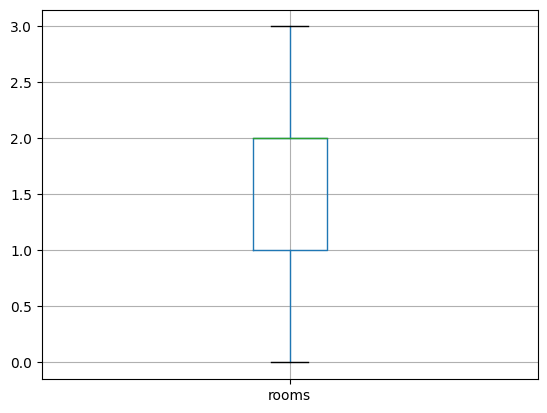



Оценка распределения по количеству в зависимости от колонки rooms


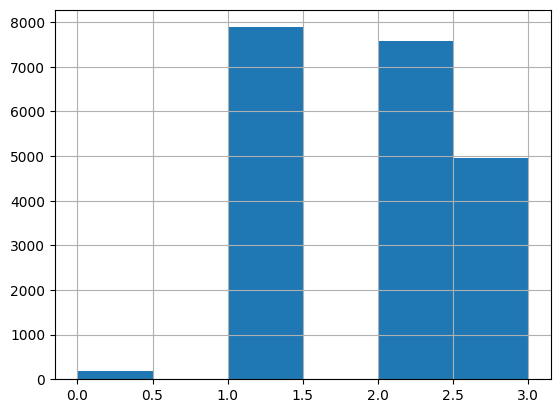

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке rooms 

count    1495.000000
mean        4.405351
std         0.724572
min         4.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: rooms, dtype: float64


Оценка характеристики распределения колонки rooms


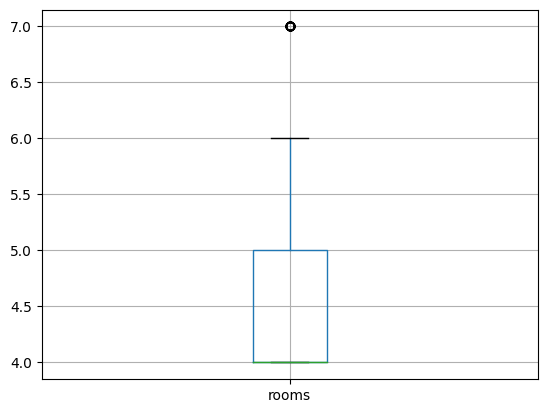



Оценка распределения по количеству в зависимости от колонки rooms


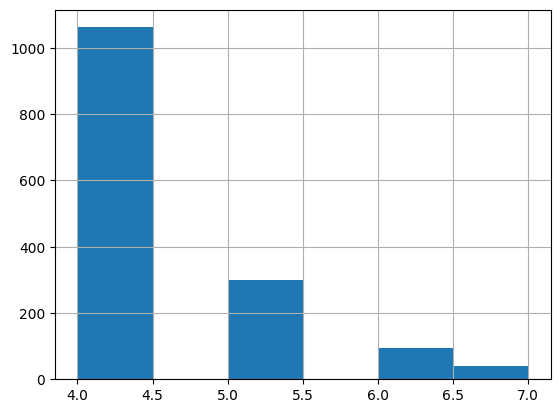

------------------------------------------------------------



In [92]:
#Исследование кол-ва комнат 
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'rooms')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'rooms')


**Вывод по last_price:** Т.к. общая выборка была разделена, в данных показателях нет особых расхождений. Единственной, что стоит отметить, данные для второй выборки несбалансированны. Видно, что количество квартир с 4-мя конматами полностью перекрывает показатели для 6 и 7 комнатных квартир. Можно задуматься над изменением  распределения группы и добавить значения с квартирами с 4-мя комнатами в группу 1. 

----------------------------Группа 1-------------------------------
Статистическая информация о колонке ceiling_height 

count    20612.000000
mean         2.663249
std          0.179360
min          2.400000
25%          2.600000
50%          2.640000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64


Оценка характеристики распределения колонки ceiling_height


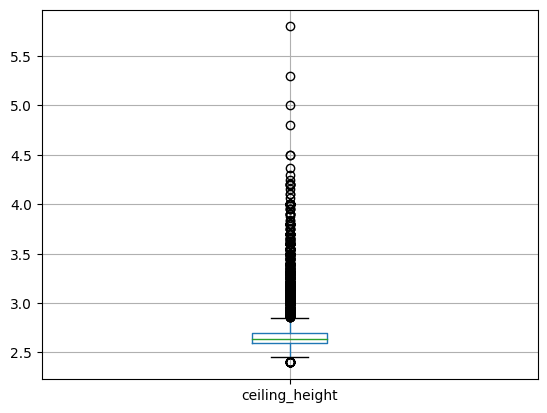



Оценка распределения по количеству в зависимости от колонки ceiling_height


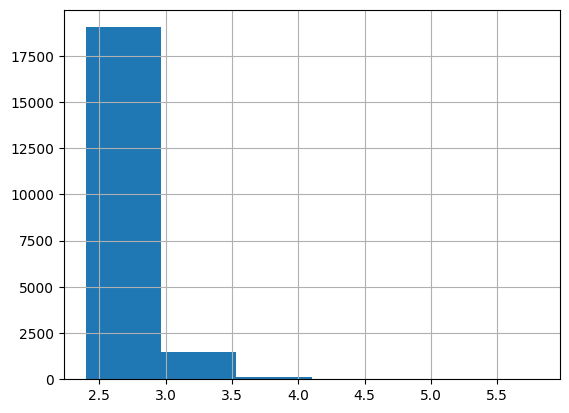

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке ceiling_height 

count    1495.000000
mean        2.961191
std         0.348194
min         2.400000
25%         2.780000
50%         2.800000
75%         3.145000
max         6.000000
Name: ceiling_height, dtype: float64


Оценка характеристики распределения колонки ceiling_height


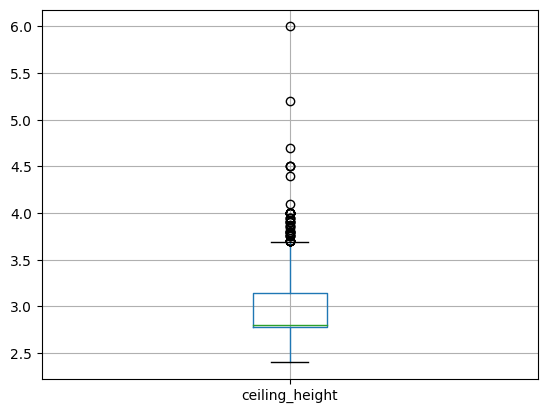



Оценка распределения по количеству в зависимости от колонки ceiling_height


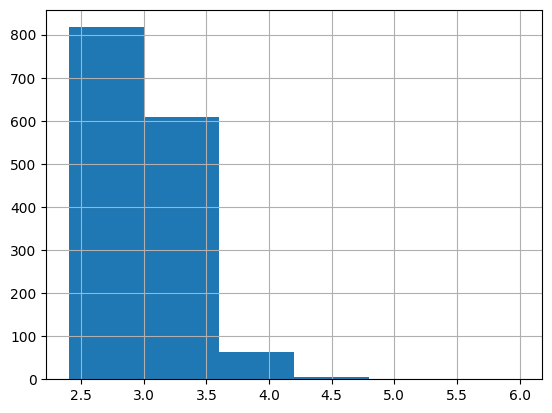

------------------------------------------------------------



In [93]:
#Исследование высоты потолков
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'ceiling_height')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'ceiling_height')
                

**Вывод по ceiling_height:** Медианное  для первой выборки составляет 2.64 метра.  Медианное  значение для второй выборки составляет 2.8 метра. Для первой группы наблюдается сильный разброс значений. Судя по стандартному отклонению для данной выборки можно предположить, что данные значение - это изначальные пропуски в датасете, которые были заполнены чуть ранее медианными значениями. Либо это ошибки при внесении данных о квартирах.
Во второй выборке разброс значений характерен для конкретной высоты потолка (выше 3.7 метра).

----------------------------Группа 1-------------------------------
Статистическая информация о колонке floor 

count    20612.000000
mean         5.970357
std          4.918840
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         31.000000
Name: floor, dtype: float64


Оценка характеристики распределения колонки floor


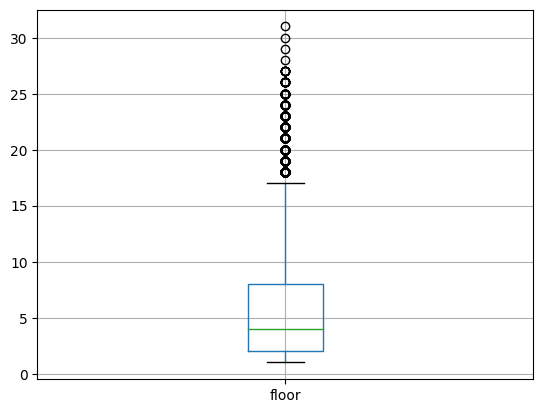



Оценка распределения по количеству в зависимости от колонки floor


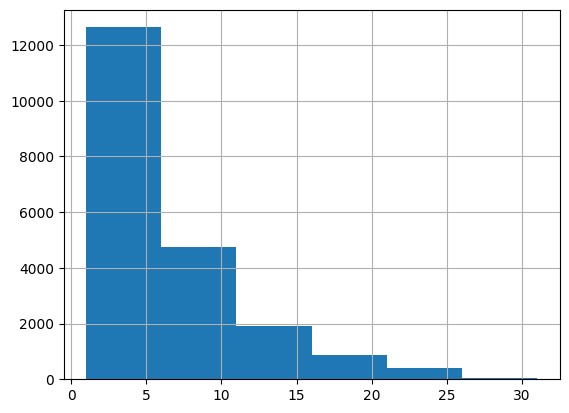

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке floor 

count    1495.000000
mean        4.515719
std         3.675726
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        25.000000
Name: floor, dtype: float64


Оценка характеристики распределения колонки floor


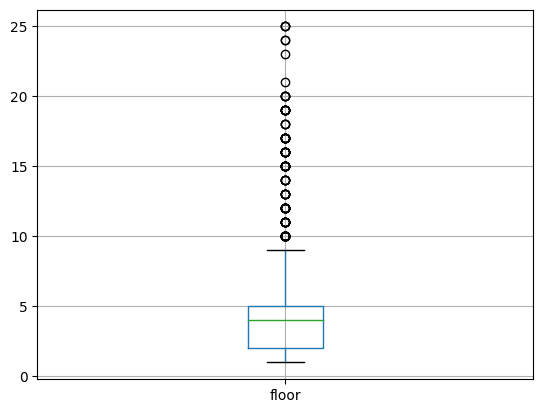



Оценка распределения по количеству в зависимости от колонки floor


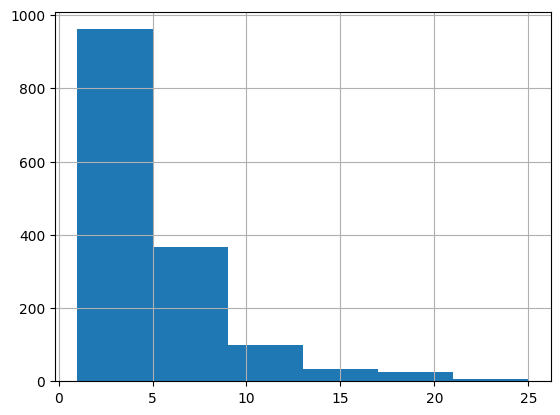

------------------------------------------------------------



In [94]:
#Исследование распределение квартир по этажам
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'floor')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'floor')


**Вывод по floor:** Большинство квартир первой выборки распологаются на 1-8 этажах. Для второй выборки большенство квартир распологаются на 1-5 этаже.

----------------------------Группа 1-------------------------------
Статистическая информация о колонке floors_total 

count    20612.000000
mean        10.926257
std          6.643949
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


Оценка характеристики распределения колонки floors_total


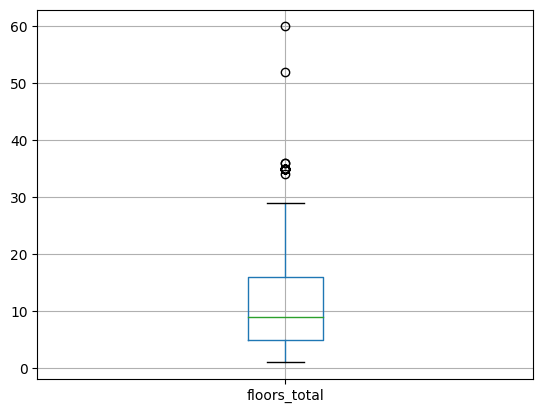



Оценка распределения по количеству в зависимости от колонки floors_total


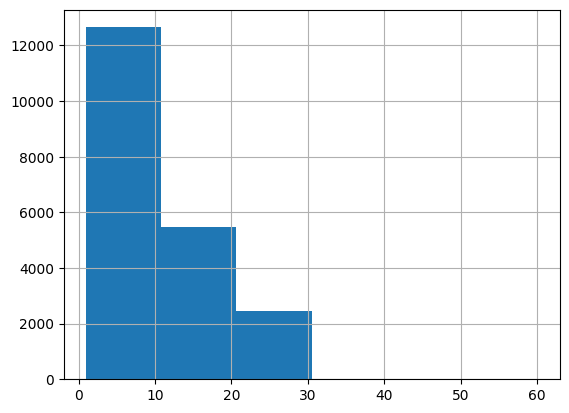

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке floors_total 

count    1495.000000
mean        7.762542
std         4.575903
min         2.000000
25%         5.000000
50%         6.000000
75%         9.000000
max        26.000000
Name: floors_total, dtype: float64


Оценка характеристики распределения колонки floors_total


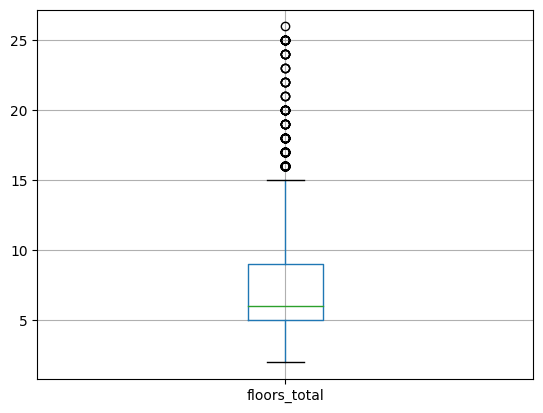



Оценка распределения по количеству в зависимости от колонки floors_total


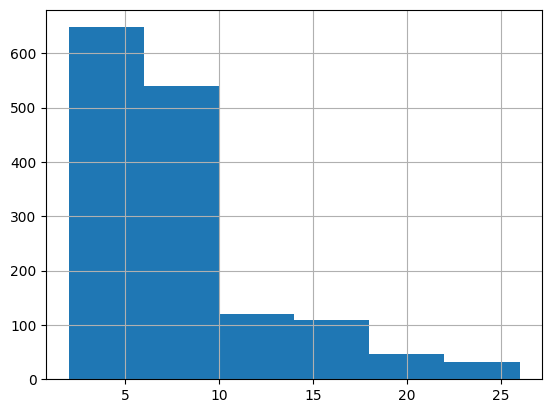

------------------------------------------------------------



In [95]:
#Исследование общего количетсва этажей в доме
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'floors_total')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'floors_total')

**Вывод по floors_total:** Большинство квартир первой выборки распологаются в 9 или 16 этажных домах. Для второй выборки большенство квартир распологаются в 6 или 9 этажных домах. Можно сделать вывод, что большие квартиры (от 4 комнат и выше) распологаются в более низких домах, чем 1, 2 или 3х комнатные квартиры.

----------------------------Группа 1-------------------------------
Статистическая информация о колонке airports_distant 

count    20612.000000
mean        28.159616
std         11.268924
min          0.000000
25%         20.000000
50%         26.000000
75%         34.000000
max         84.000000
Name: airports_distant, dtype: float64


Оценка характеристики распределения колонки airports_distant


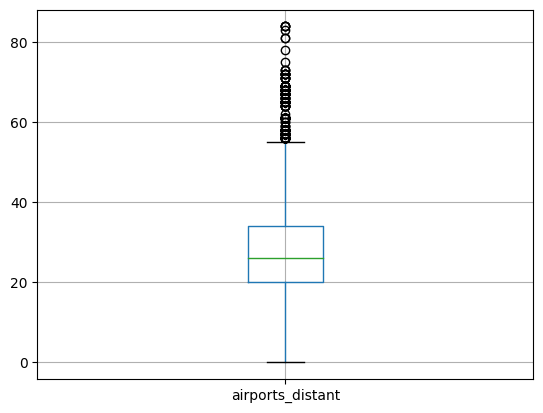



Оценка распределения по количеству в зависимости от колонки airports_distant


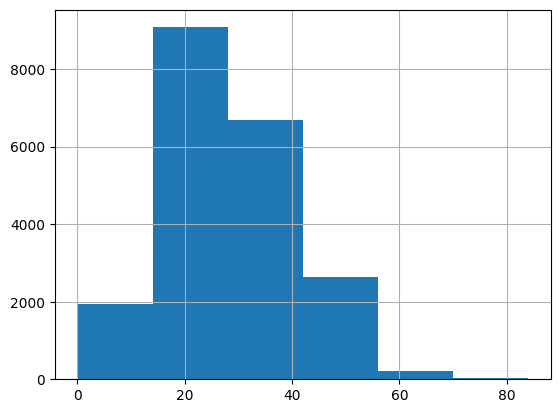

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке airports_distant 

count    1495.000000
mean       26.187291
std         8.900068
min         9.000000
25%        21.000000
50%        24.000000
75%        29.000000
max        73.000000
Name: airports_distant, dtype: float64


Оценка характеристики распределения колонки airports_distant


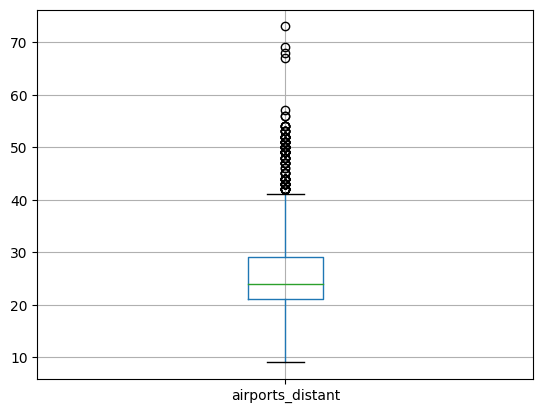



Оценка распределения по количеству в зависимости от колонки airports_distant


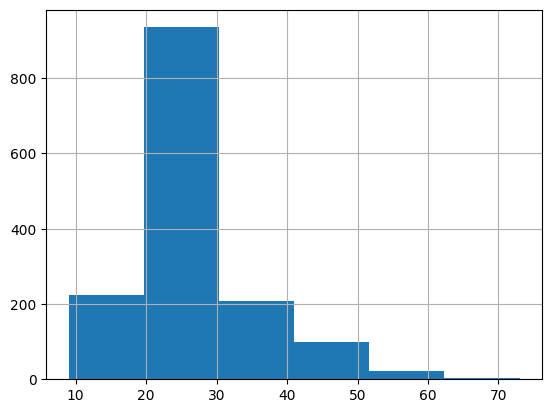

------------------------------------------------------------



In [96]:
#Исследование дистанции от квартиры до аэрапотра 
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'airports_distant')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'airports_distant')

----------------------------Группа 1-------------------------------
Статистическая информация о колонке cityCenters_distant 

count    20612.000000
mean        14.131186
std          7.320817
min          0.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         65.000000
Name: cityCenters_distant, dtype: float64


Оценка характеристики распределения колонки cityCenters_distant


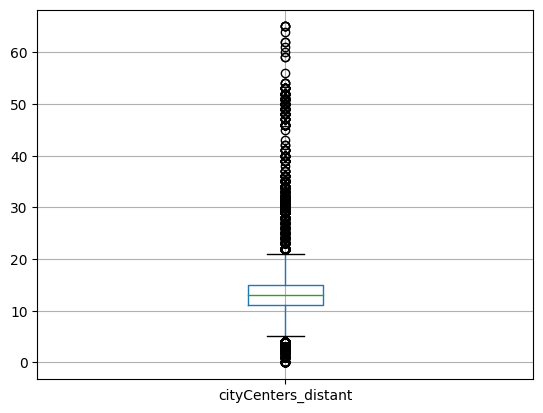



Оценка распределения по количеству в зависимости от колонки cityCenters_distant


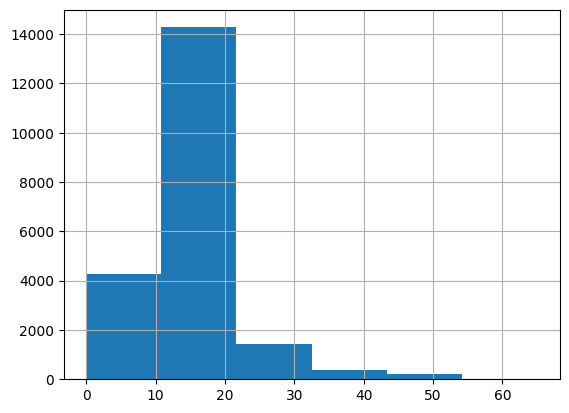

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке cityCenters_distant 

count    1495.000000
mean        8.624080
std         8.074234
min         0.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        54.000000
Name: cityCenters_distant, dtype: float64


Оценка характеристики распределения колонки cityCenters_distant


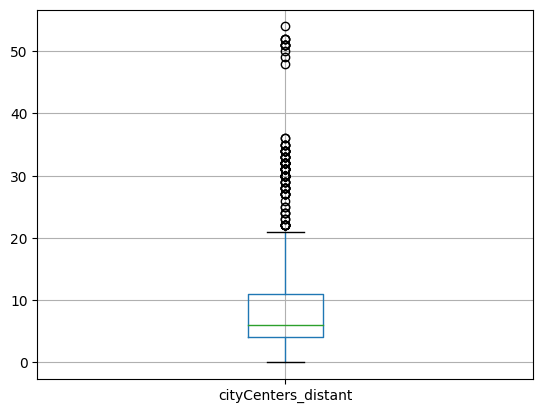



Оценка распределения по количеству в зависимости от колонки cityCenters_distant


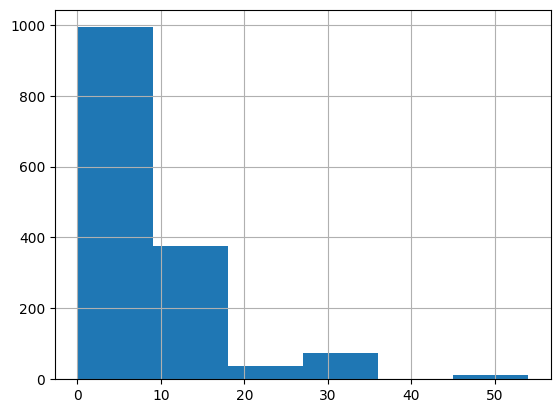

------------------------------------------------------------



In [97]:
#Исследование дистанции до центра города
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'cityCenters_distant')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'cityCenters_distant')


**Вывод по airports_distant, cityCenters_distant:** Выявлена необычная закономерность, что выборка 1 находится дальше от центра города и от аэрапорта чем выборка 2. Хотя если судить по современному устройству городов, то выборка 1 должна быть ближе к аэрапорту. Потенцаильно для выборки 2 могут быть завышены значения для привлечения покупателей. Также у выборки 1 наблюдается сильный шлейф вбросовых значений в значениях расстояния до центра города.

----------------------------Группа 1-------------------------------
Статистическая информация о колонке parks_nearest 

count    20612.00000
mean       470.11178
std        192.07972
min          1.00000
25%        456.00000
50%        458.00000
75%        459.00000
max       3190.00000
Name: parks_nearest, dtype: float64


Оценка характеристики распределения колонки parks_nearest


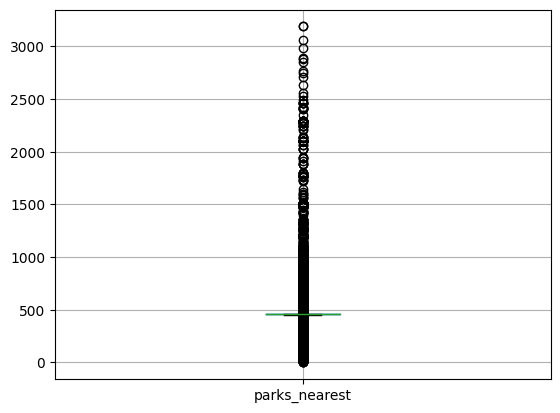



Оценка распределения по количеству в зависимости от колонки parks_nearest


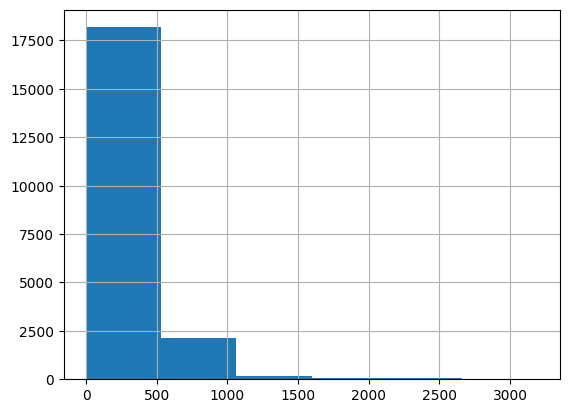

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке parks_nearest 

count    1495.000000
mean      438.936455
std       217.519183
min        21.000000
25%       390.000000
50%       439.000000
75%       440.000000
max      3013.000000
Name: parks_nearest, dtype: float64


Оценка характеристики распределения колонки parks_nearest


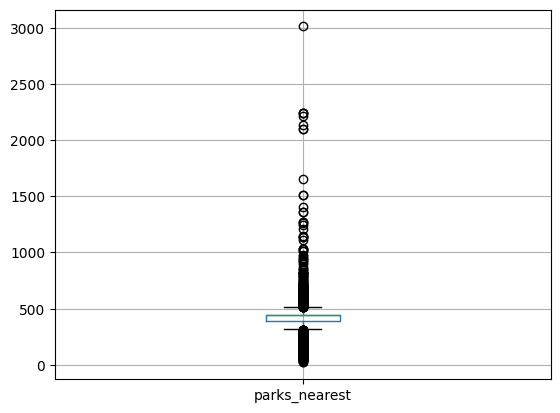



Оценка распределения по количеству в зависимости от колонки parks_nearest


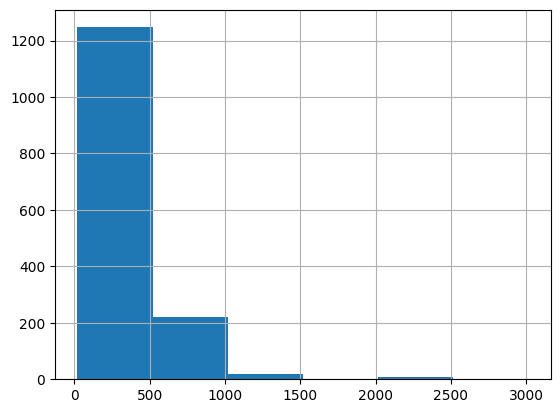

------------------------------------------------------------



In [98]:
 #Исследование дистанции до парка
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'parks_nearest')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'parks_nearest')


----------------------------Группа 1-------------------------------
Статистическая информация о колонке ponds_nearest 

count    20612.000000
mean       516.321512
std        166.086592
min         13.000000
25%        504.000000
50%        507.000000
75%        515.000000
max       1344.000000
Name: ponds_nearest, dtype: float64


Оценка характеристики распределения колонки ponds_nearest


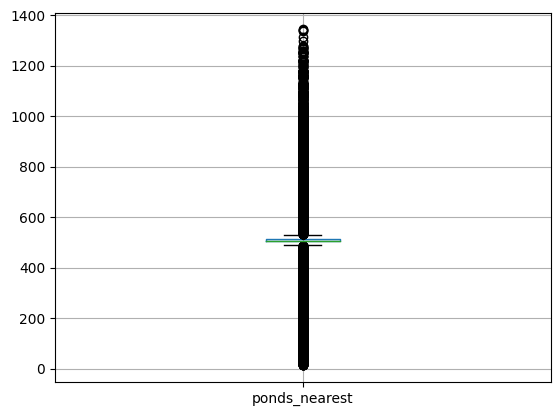



Оценка распределения по количеству в зависимости от колонки ponds_nearest


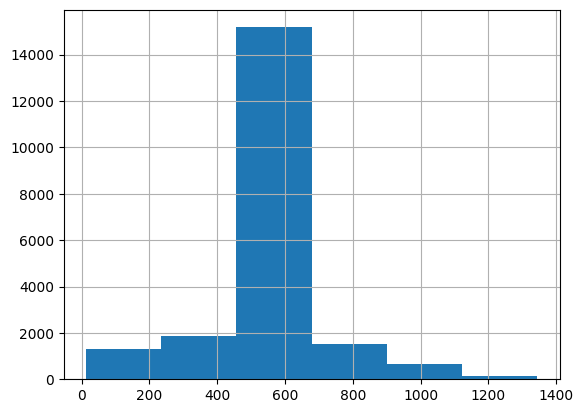

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке ponds_nearest 

count    1495.000000
mean      465.807358
std       212.494748
min        16.000000
25%       410.000000
50%       454.000000
75%       486.500000
max      1270.000000
Name: ponds_nearest, dtype: float64


Оценка характеристики распределения колонки ponds_nearest


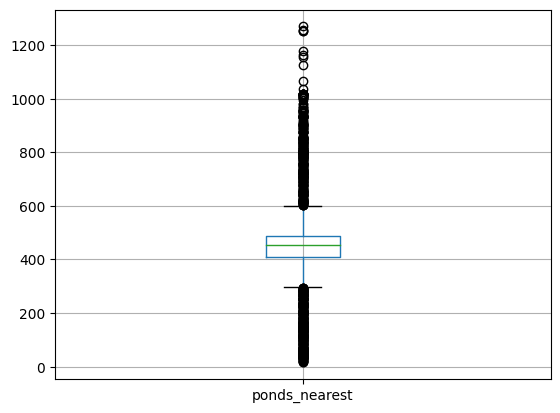



Оценка распределения по количеству в зависимости от колонки ponds_nearest


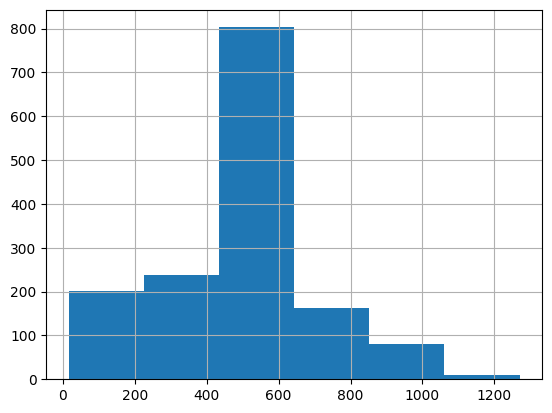

------------------------------------------------------------



In [99]:
 #Исследование дистанции до водоема
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'ponds_nearest')
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'ponds_nearest')


**Вывод по parks_nearest, ponds_nearest:** Для обоих групп в обоих исследуемых колонках выявлен сильный разброс значений. Так же присутствует большое стандартное отклонение для двух групп. Судя по гистограммам, для большенства квартир преобладает определенная дистанция до парка и водоема. Потенциально, это может объяснятся тем, что квартиры находятся в одном районе, либо повысилось качество благоустройства городов, что позволяет с каждым спальным районом строить парки или большенство данных указано некорректно (т.е. дистанция была целенаправленно занижена или завышена при публикации объявления).

----------------------------Группа 1-------------------------------
Статистическая информация о колонке publication_day 

count    20612.000000
mean         2.571997
std          1.791930
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publication_day, dtype: float64


Оценка характеристики распределения колонки publication_day


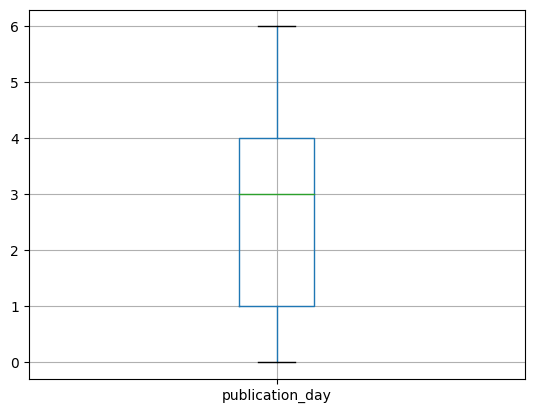



Оценка распределения по количеству в зависимости от колонки publication_day


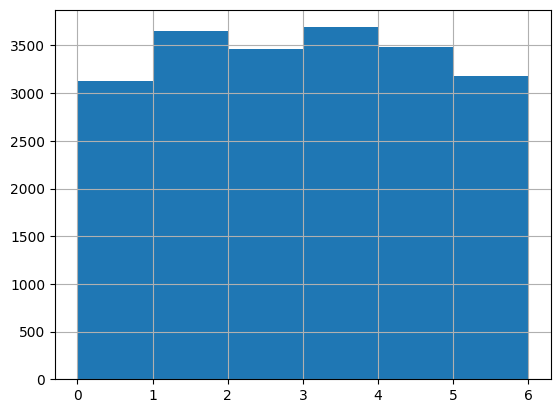

------------------------------------------------------------

----------------------------Группа 2-------------------------------
Статистическая информация о колонке publication_day 

count    1495.000000
mean        2.538462
std         1.744285
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: publication_day, dtype: float64


Оценка характеристики распределения колонки publication_day


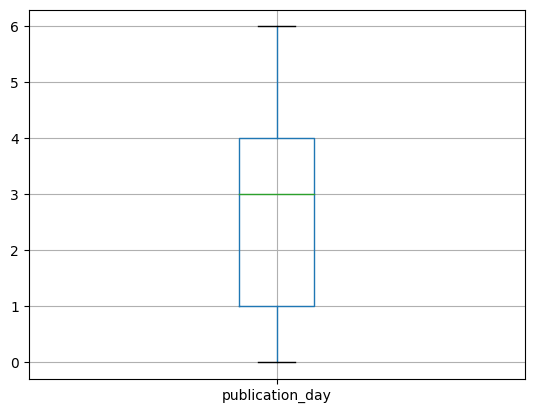



Оценка распределения по количеству в зависимости от колонки publication_day


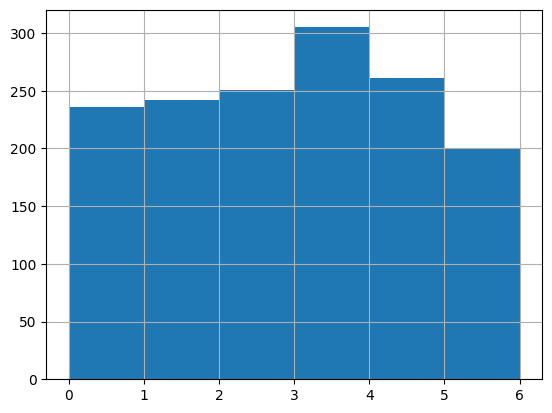

------------------------------------------------------------



In [100]:
 #Исследование дней недели по публикаяим объявлений 
print('----------------------------Группа 1-------------------------------')
analys_group(rooms_group_1, 'publication_day', 6)
print('----------------------------Группа 2-------------------------------')
analys_group(rooms_group_2, 'publication_day')


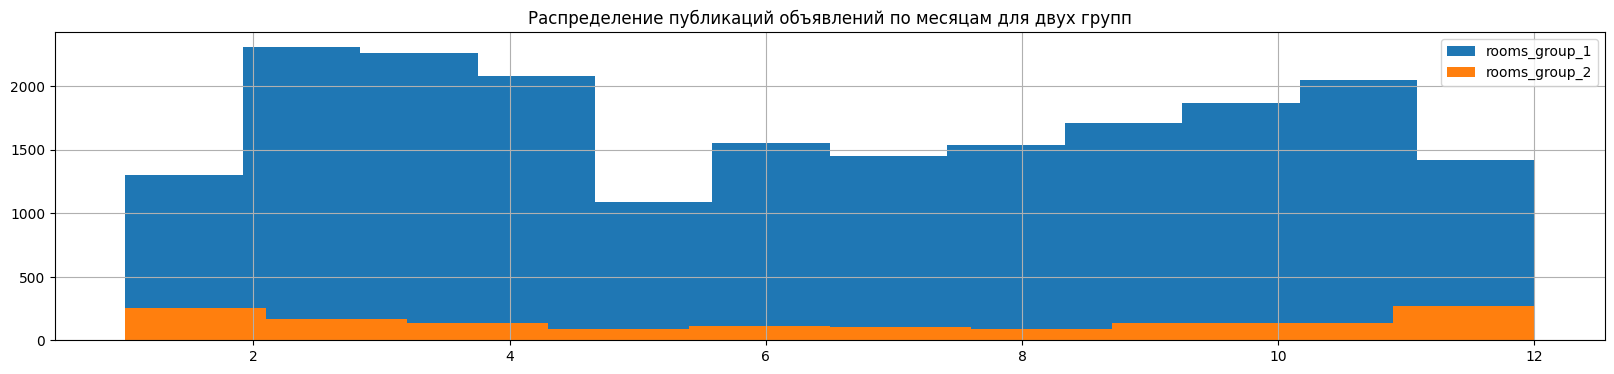

In [101]:
 #Исследование месяцев по публикаяим объявлений 
ax = plt.subplot()
rooms_group_1['publication_month'].hist(figsize = (20, 4), bins = 12)
rooms_group_2['publication_month'].hist()
plt.title('Распределение публикаций объявлений по месяцам для двух групп')
plt.legend(['rooms_group_1', 'rooms_group_2'])
plt.show()


**Вывод по publication_day, publication_month:** В основном, больших различий между днями публикаций объявлений нет. Все значения распределены равномерно. В исследовании месяцев публикаций было выявлено, что реже всего публикуют объявления в 1,5 и 12 месяц. (январь, май и декабрь соответственно)

4.2 Исследование времени необходимого для продажи квартиры

count    18091.000000
mean       171.238682
std        210.164771
min          1.000000
25%         43.000000
50%         90.000000
75%        216.000000
max       1580.000000
Name: days_exposition, dtype: float64


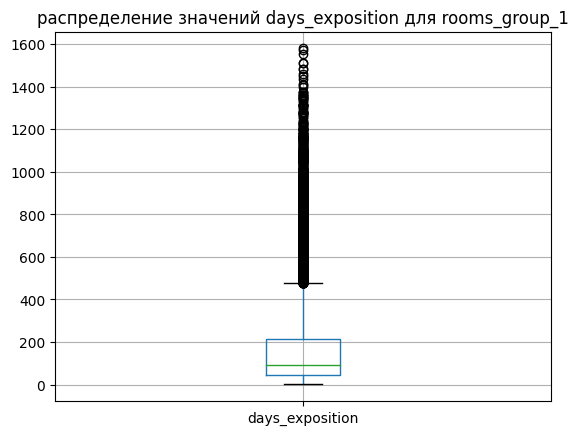

In [102]:
#как быстро продавались квартиры в группе 1
rooms_group_1.boxplot('days_exposition')
plt.title('распределение значений days_exposition для rooms_group_1')
print(rooms_group_1['days_exposition'].describe())


Из графика видно, что среднее время сильно зависит от аномальных данных. На гистограмме видно, что есть квартиры которые были в прожаде целых 1400 дней. Медианное значение равняется 91 деню. Среднее время продажи квартиры равняется 171 день.
Быстрыми продажами квартиры можно считать все те, что были проданы быстрее 43 дней (все что входит в 25% квантиль). Так же стоит отметить, что была обнаружена аномалия с временем продажи в 1 день. Либо это ошибка или это различного рода проводимые махинации. Долгими продажами можно считать все те, что дольше 216 дней ( всё что выше 75% квантеля).

count    1165.000000
mean      269.568240
std       274.918247
min         3.000000
25%        74.000000
50%       172.000000
75%       380.000000
max      1497.000000
Name: days_exposition, dtype: float64


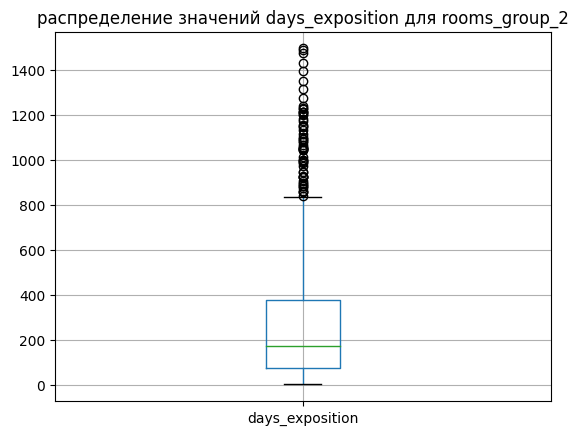

In [103]:
#как быстро продавались квартиры в группе 2
rooms_group_2.boxplot('days_exposition')
plt.title('распределение значений days_exposition для rooms_group_2')
print(rooms_group_2['days_exposition'].describe())

Медианной значение для второй группы равняется 172 дня. Среднее время продажи квартиры равняется 269 дней.
Быстрыми продажами квартиры можно считать все те, что были проданы быстрее 74 дней (все что входит в 25% квантиль). Долгими продажами можно считать все те, что дольше 380 дней (всё что выше 75% квантеля).

4.3 Изучение факторов, которые больше всего влияют на общую (полную) стоимость объекта.

----------------------------Группа 1-------------------------------


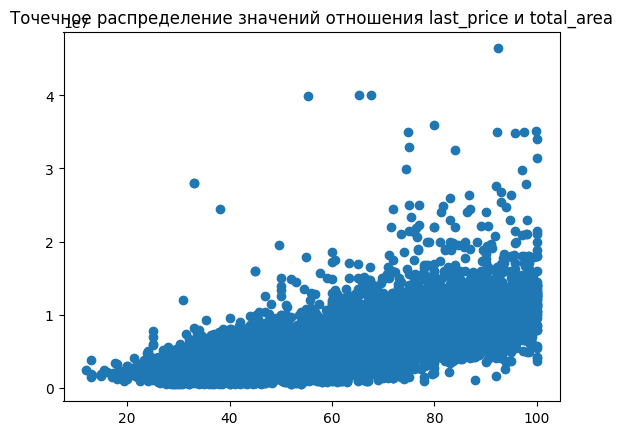

----------------------------Группа 2-------------------------------


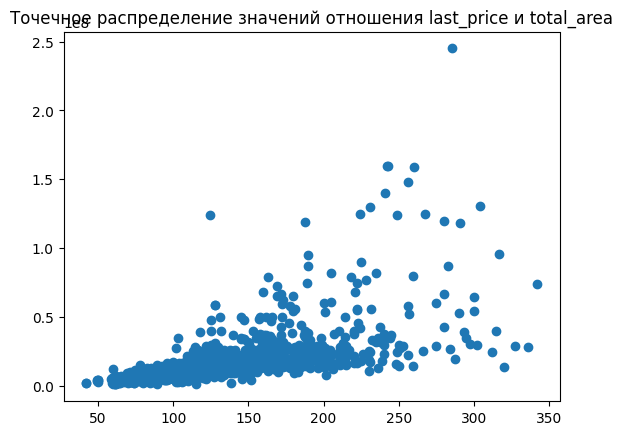

In [104]:
print('----------------------------Группа 1-------------------------------')
plt.scatter(y = rooms_group_1['last_price'], x = rooms_group_1['total_area'])
plt.title('Точечное распределение значений отношения last_price и total_area')
plt.show()

print('----------------------------Группа 2-------------------------------')
plt.scatter(y = rooms_group_2['last_price'], x = rooms_group_2['total_area'])
plt.title('Точечное распределение значений отношения last_price и total_area')
plt.show()

----------------------------Группа 1-------------------------------


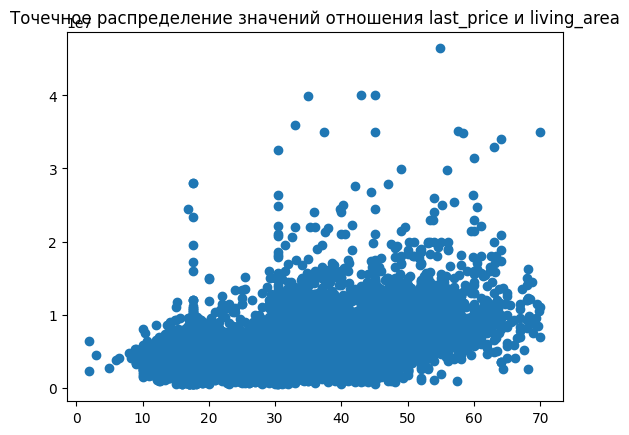

----------------------------Группа 2-------------------------------


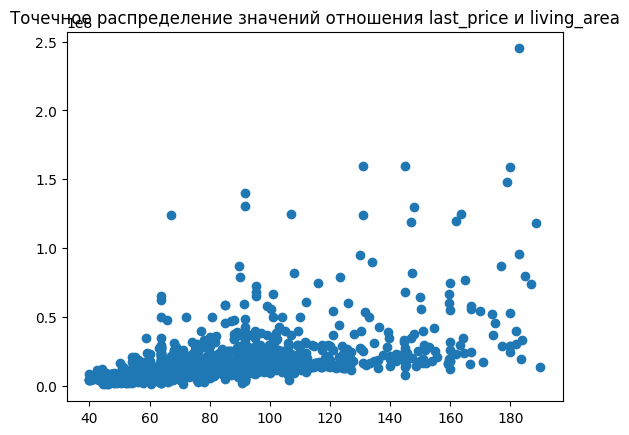

In [105]:
print('----------------------------Группа 1-------------------------------')
plt.scatter(y = rooms_group_1['last_price'], x = rooms_group_1['living_area'])
plt.title('Точечное распределение значений отношения last_price и living_area')
plt.show()

print('----------------------------Группа 2-------------------------------')
plt.scatter(y = rooms_group_2['last_price'], x = rooms_group_2['living_area'])
plt.title('Точечное распределение значений отношения last_price и living_area')
plt.show()

----------------------------Группа 1-------------------------------


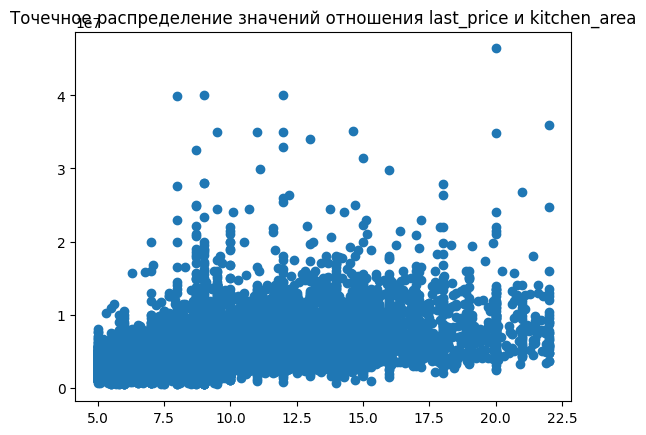

----------------------------Группа 2-------------------------------


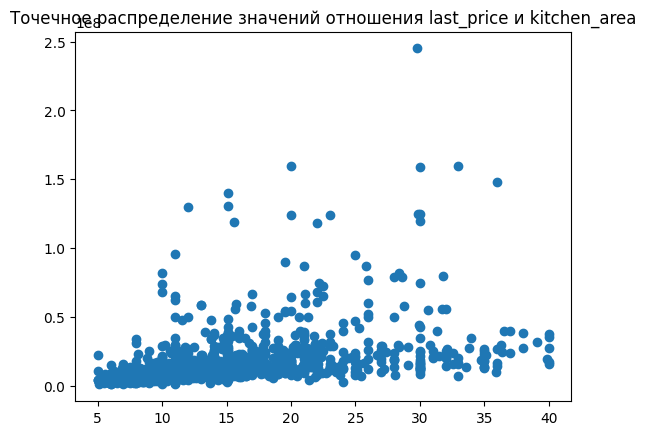

In [106]:
print('----------------------------Группа 1-------------------------------')
plt.scatter(y = rooms_group_1['last_price'], x = rooms_group_1['kitchen_area'])
plt.title('Точечное распределение значений отношения last_price и kitchen_area')
plt.show()

print('----------------------------Группа 2-------------------------------')
plt.scatter(y = rooms_group_2['last_price'], x = rooms_group_2['kitchen_area'])
plt.title('Точечное распределение значений отношения last_price и kitchen_area')
plt.show()




----------------------------Группа 1-------------------------------


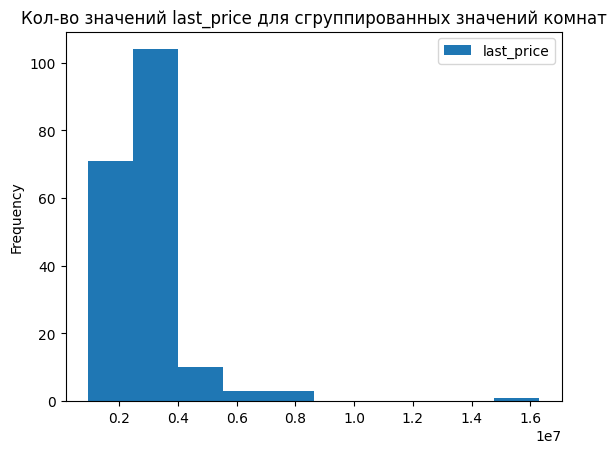

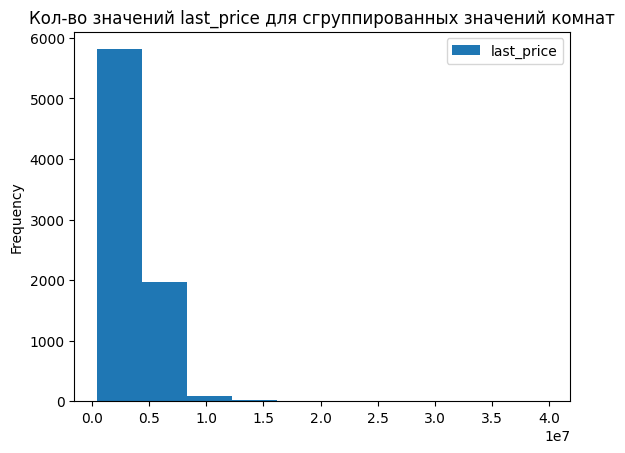

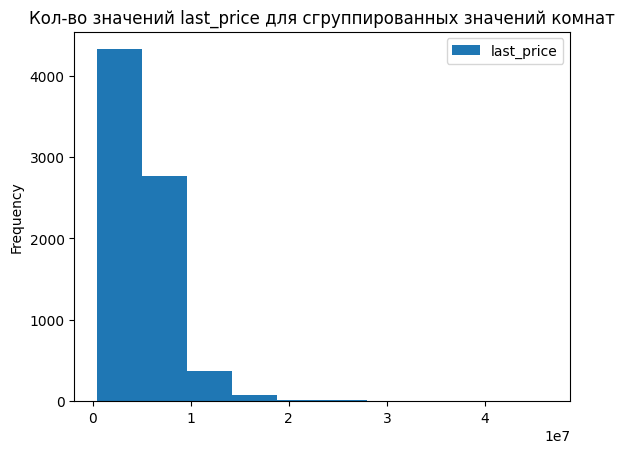

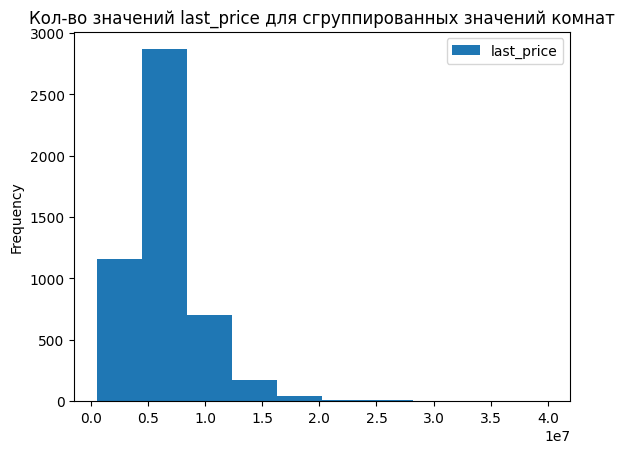

In [107]:
print('----------------------------Группа 1-------------------------------')
gr = rooms_group_1.groupby('rooms')
gr.plot(kind = 'hist', x = 'rooms', y = 'last_price',\
        title = 'Кол-во значений last_price для сгруппированных значений комнат')
plt.show()


----------------------------Группа 2-------------------------------


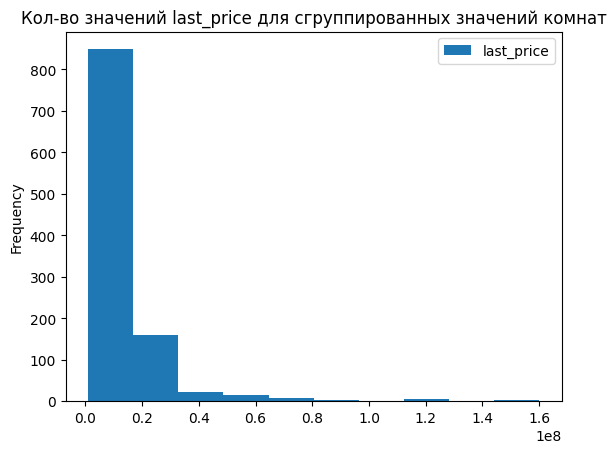

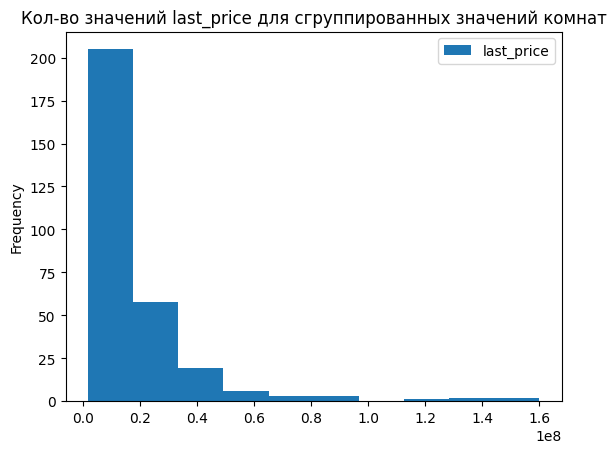

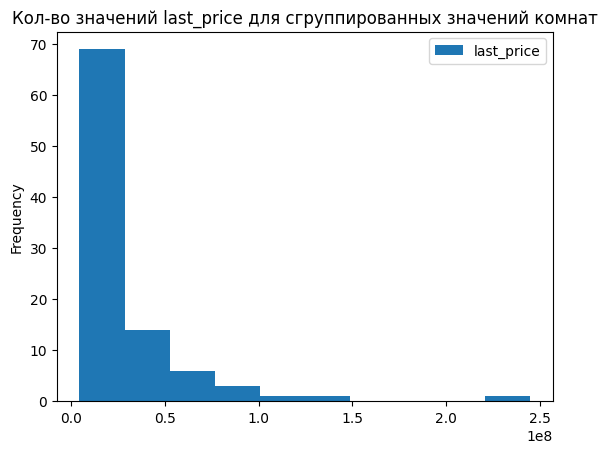

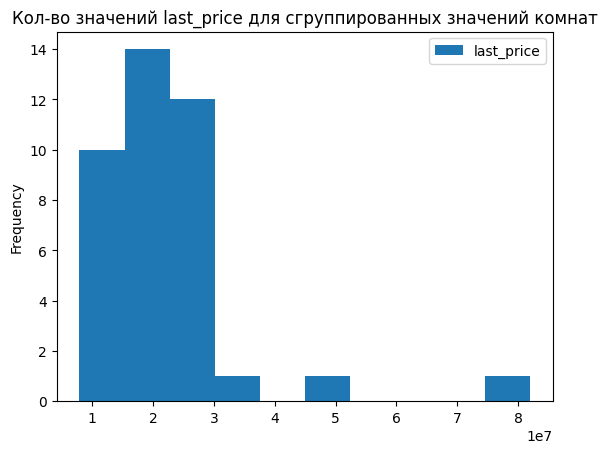

In [108]:
print('----------------------------Группа 2-------------------------------')
gr = rooms_group_2.groupby('rooms')
gr.plot(kind = 'hist', x = 'rooms', y = 'last_price',\
        title = 'Кол-во значений last_price для сгруппированных значений комнат')
plt.show()

----------------------------Группа 1-------------------------------


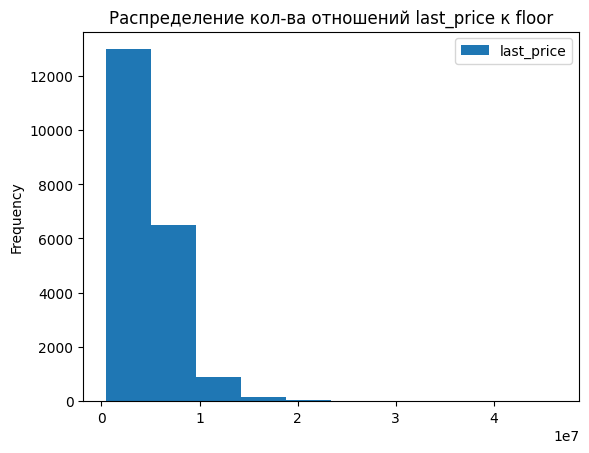

----------------------------Группа 2-------------------------------


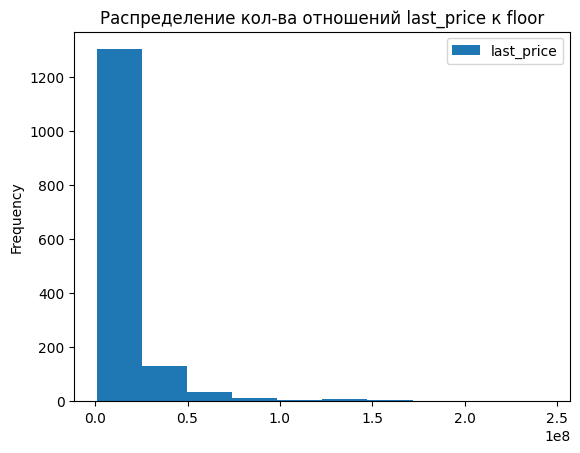

In [109]:
print('----------------------------Группа 1-------------------------------')
rooms_group_1.plot(kind = 'hist', y = 'last_price', x = 'floor',\
#                    Кол-во значений last_price для сгруппированных значений комнат4
                   title = 'Распределение кол-ва отношений last_price к floor')
plt.show()

print('----------------------------Группа 2-------------------------------')
rooms_group_2.plot(kind = 'hist', y = 'last_price', title = 'Распределение кол-ва отношений last_price к floor')
plt.show()

----------------------------Группа 1-------------------------------


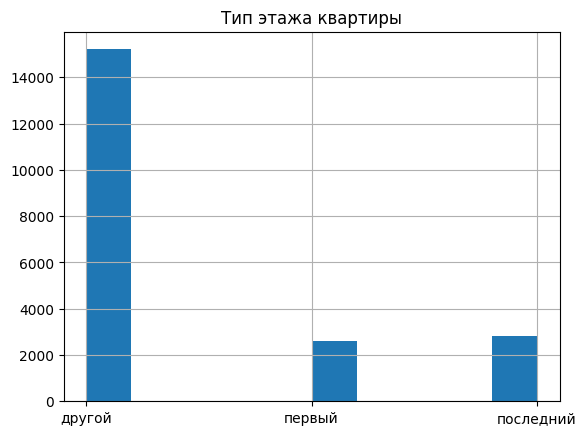

----------------------------Группа 2-------------------------------


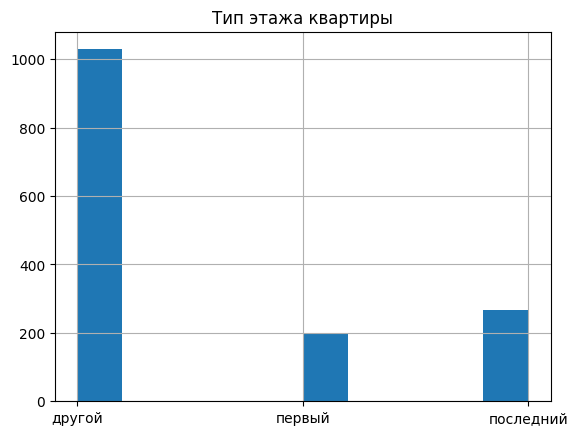

In [110]:
print('----------------------------Группа 1-------------------------------')
rooms_group_1['type_floor'].sort_values().hist()
plt.title('Тип этажа квартиры')
plt.show()

print('----------------------------Группа 2-------------------------------')
rooms_group_2['type_floor'].sort_values().hist()
plt.title('Тип этажа квартиры')
plt.show()

----------------------------Группа 1-------------------------------


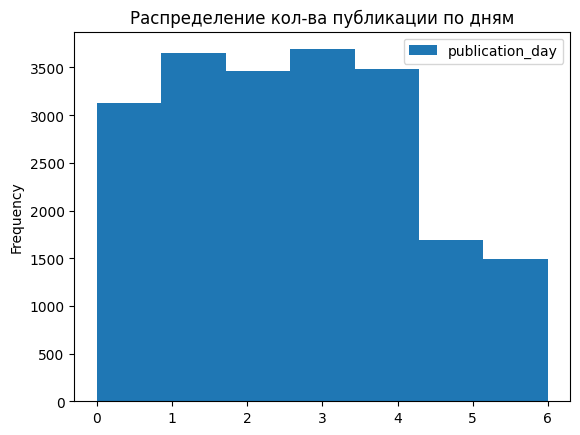

----------------------------Группа 2-------------------------------


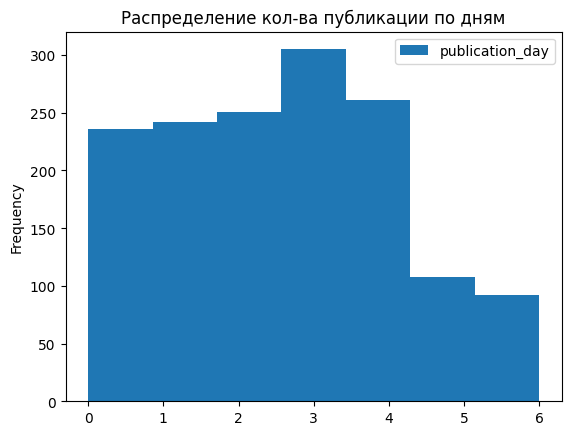

In [111]:
print('----------------------------Группа 1-------------------------------')
rooms_group_1.plot(kind = 'hist', x = 'last_price', y = 'publication_day', bins = 7,\
                   title = 'Распределение кол-ва публикации по дням')
plt.show()


print('----------------------------Группа 2-------------------------------')
rooms_group_2.plot(kind = 'hist', x = 'last_price', y = 'publication_day', bins = 7,\
                   title = 'Распределение кол-ва публикации по дням')
plt.show()

----------------------------Группа 1-------------------------------


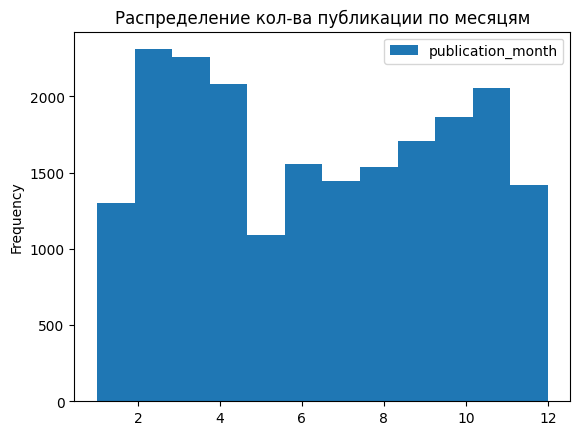

----------------------------Группа 2-------------------------------


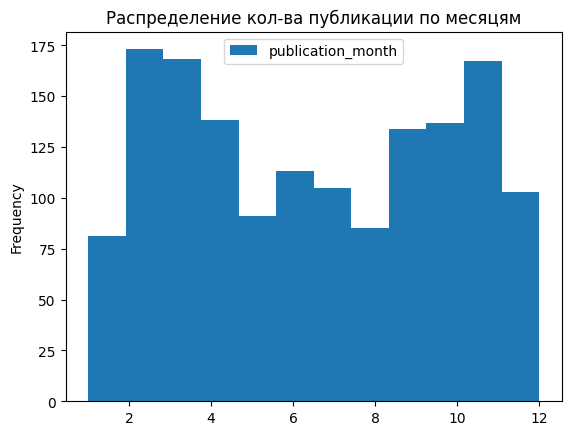

In [112]:
print('----------------------------Группа 1-------------------------------')
rooms_group_1.plot(kind = 'hist', x = 'last_price', y = 'publication_month', bins = 12,\
                   title = 'Распределение кол-ва публикации по месяцям')
plt.show()


print('----------------------------Группа 2-------------------------------')
rooms_group_2.plot(kind = 'hist', x = 'last_price', y = 'publication_month', bins = 12,\
                   title = 'Распределение кол-ва публикации по месяцям')
plt.show()

----------------------------Группа 1-------------------------------


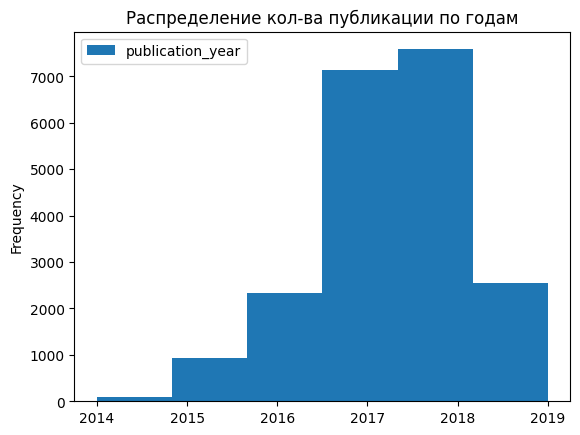

----------------------------Группа 2-------------------------------


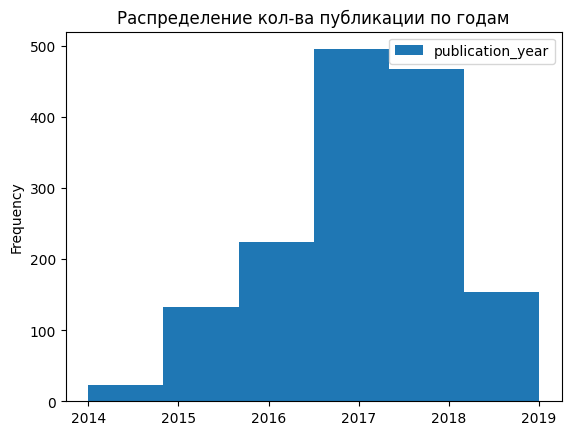

In [113]:
print('----------------------------Группа 1-------------------------------')
rooms_group_1.plot(kind = 'hist', x = 'last_price', y = 'publication_year', bins = 6,\
                   title = 'Распределение кол-ва публикации по годам')
plt.show()


print('----------------------------Группа 2-------------------------------')
rooms_group_2.plot(kind = 'hist', x = 'last_price', y = 'publication_year', bins = 6,\
                   title = 'Распределение кол-ва публикации по годам')
plt.show()

Из графиков видно слабое влияние дня, месяца и года на цену квартиры. Видна зависимость между ценой и общей, жилой площадью квартиры, этажом квартиры и её расположение на этаже, а также площади кухни. Для более подробного исследования зависимости построим таблицу корреляции данных.

                   last_price_corr_1  last_price_corr_2
total_area                  0.655617           0.640685
living_area                 0.508304           0.558539
kitchen_area                0.453307           0.435110
rooms                       0.372469           0.214368
floor                       0.117505           0.083879
publication_day            -0.014185          -0.006674
publication_month           0.001443           0.007178
publication_year            0.004543          -0.095245


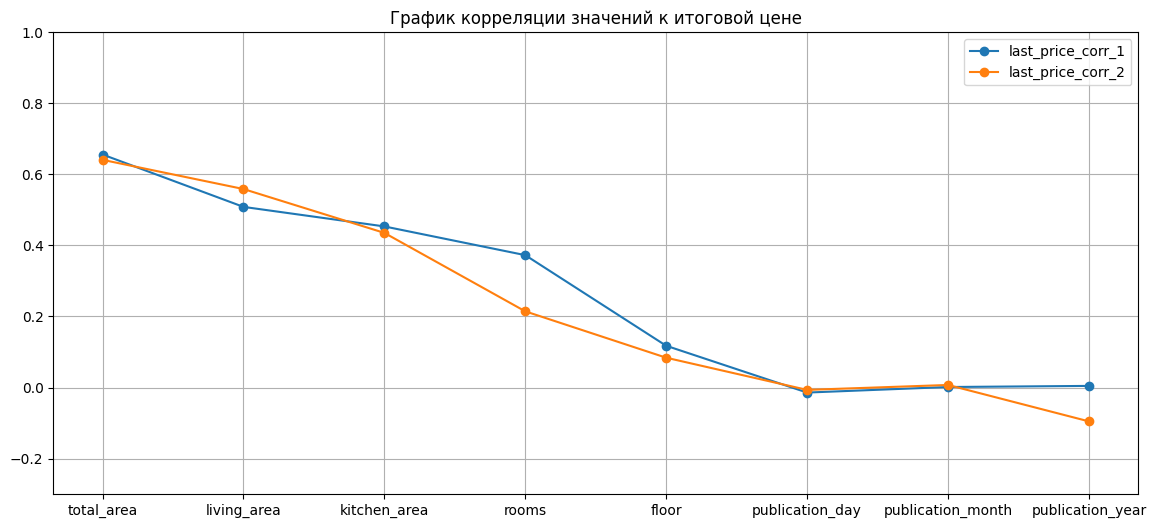

In [114]:
# Изучение корреляции данных
values = ['total_area','living_area', 'kitchen_area',
          'rooms','floor', 'publication_day',
          'publication_month', 'publication_year']

corr_1 = []
for i in values:
    x = rooms_group_1['last_price'].corr(rooms_group_1[i])
    corr_1.append(x)

corr_2 = []
for i in values:
    x = rooms_group_2['last_price'].corr(rooms_group_2[i])
    corr_2.append(x)
    
data = {'last_price_corr_1': corr_1, 'last_price_corr_2': corr_2}     
corr_table = pd.DataFrame(data = data, index = values)
print(corr_table)


corr_table.plot(style = 'o-', figsize = (14, 6), ylim = (-0.3, 1), grid = True,\
                title = 'График корреляции значений к итоговой цене')
plt.show()


При построеннии графика видно, что для группы 1 и 2 характерны общие параметры влияния на цену продажи. На цену, в основном, влияет общая площадь квартиры, но кореляция не сильная, примерно 0.65. Полностью не корелирующими факторами являются день, месяц и год публикации объявления и этаж квартиры. Слабо коррелирующими являются кол-во комнат и площадь кухни.

4.4 Поиск цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [115]:
# Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений для группы 1

print('----------------------------Группа 1-------------------------------')
locality_high_1 = rooms_group_1.groupby('locality_name').agg({'kitchen_area':'count', 'price_for_area': 'median'})\
            .sort_values('kitchen_area', ascending = False).head(10)

print('\nCредняя цена одного квадратного метра в 10 населённых пунктах для группы 1') 
print(locality_high_1.head(10))





----------------------------Группа 1-------------------------------

Cредняя цена одного квадратного метра в 10 населённых пунктах для группы 1
                 kitchen_area  price_for_area
locality_name                                
Санкт-Петербург         13159      103921.570
Мурино                    571       86272.480
Кудрово                   454       95791.450
Шушары                    425       76923.080
Всеволожск                377       65789.470
Пушкин                    322       98547.275
Парголово                 322       91984.435
Колпино                   310       75000.000
Гатчина                   289       67927.170
Выборг                    208       58546.820


In [116]:
# Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений для группы 2

print('\n----------------------------Группа 2-------------------------------')
locality_high_2 = rooms_group_2.groupby('locality_name').agg({'kitchen_area':'count', 'price_for_area': 'median'})\
            .sort_values('kitchen_area', ascending = False).head(10)

print('\nCредняя цена одного квадратного метра в 10 населённых пунктах для группы 2') 
print(locality_high_2.head(10))


----------------------------Группа 2-------------------------------

Cредняя цена одного квадратного метра в 10 населённых пунктах для группы 2
                 kitchen_area  price_for_area
locality_name                                
Санкт-Петербург          1261      100160.260
Колпино                    21       62992.130
Пушкин                     16       99615.385
Выборг                     16       55413.550
Красное Село               14       63035.990
Всеволожск                 11       56766.060
Шушары                     10       72988.395
Ломоносов                   9       70907.190
Сертолово                   8       56433.945
Кингисепп                   8       40885.415


**Вывод:** Cредняя цена одного квадратного метра самого часто встречающегося города в объявлениях для группы 1 составляет 103921.57 за 1 квадртаный метр в городе Санкт-Петербург. У группы 2 также самая популярная локация является Санкт-Петербург, и средняя цена одного квадратного метра состовляет 100160,26. Так же было выявлено, что цена за квадратный метр у многокомнатных квартир (4 и выше) меньше чем для стандартных квартир. 

4.5 Исследования средней цены каждого километра до центра города в Санкт-Петербурге.

In [117]:
# Cредняя цена каждого километра до центра Санкт-Петербурга для квартир из группы 1.

#создаём отдельную колонку  с ценой за 1 км.
rooms_group_1['price_for_distant'] = round(rooms_group_1['last_price'] / rooms_group_1['cityCenters_distant'], 2)


pivot_distance_price_1 = rooms_group_1.query('locality_name == ["Санкт-Петербург"]')\
                        .pivot_table(index = 'cityCenters_distant' , values = 'price_for_distant', aggfunc = 'median')

pivot_distance_price_1['price_for_distant'] = round(pivot_distance_price_1['price_for_distant'], 2)

print(pivot_distance_price_1)


                     price_for_distant
cityCenters_distant                   
0                                  inf
1                           8255000.00
2                           3778250.00
3                           2316666.67
4                           1925000.00
5                           1482000.00
6                           1108333.33
7                            928571.43
8                            731250.00
9                            533333.33
10                           490000.00
11                           445000.00
12                           408333.33
13                           392269.23
14                           338214.28
15                           314333.33
16                           284375.00
17                           257015.76
18                           238888.89
19                           235500.00
20                           280818.95
21                           219047.62
22                           218181.82
23                       

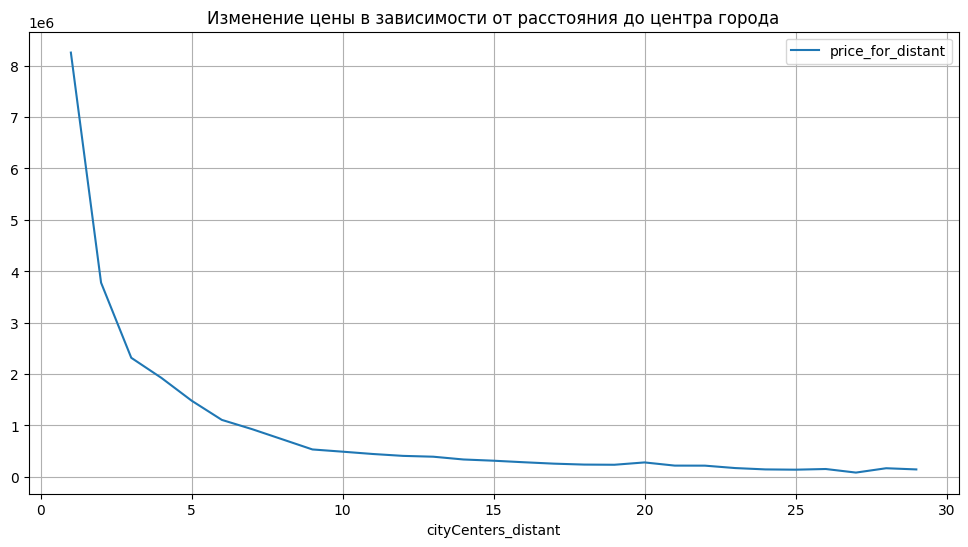

In [118]:
pivot_distance_price_1.plot(grid = True, figsize = (12,6),\
                            title = 'Изменение цены в зависимости от расстояния до центра города');

In [119]:
# Cредняя цена каждого километра до центра Санкт-Петербурга для квартир из группы 2.

#создаём отдельную колонку  с ценой за 1 км.
rooms_group_2['price_for_distant'] = round(rooms_group_2['last_price'] / rooms_group_2['cityCenters_distant'], 2)


pivot_distance_price_2 = rooms_group_2.query('locality_name == ["Санкт-Петербург"]')\
                        .pivot_table(index = 'cityCenters_distant' , values = 'price_for_distant', aggfunc = 'median')

pivot_distance_price_2['price_for_distant'] = round(pivot_distance_price_2['price_for_distant'], 2)

print(pivot_distance_price_2)


                     price_for_distant
cityCenters_distant                   
0                                  inf
1                          13000000.00
2                           6590000.00
3                           4166666.67
4                           3206250.00
5                           2900000.00
6                           4509500.00
7                           2738571.42
8                           1975125.00
9                           1166666.66
10                           730000.00
11                           845454.55
12                           750000.00
13                           615384.62
14                           630357.14
15                           506666.66
16                           562187.50
17                           380882.35
18                           637500.00
19                           305236.84
20                           353825.00
21                           338095.24
22                           326818.18


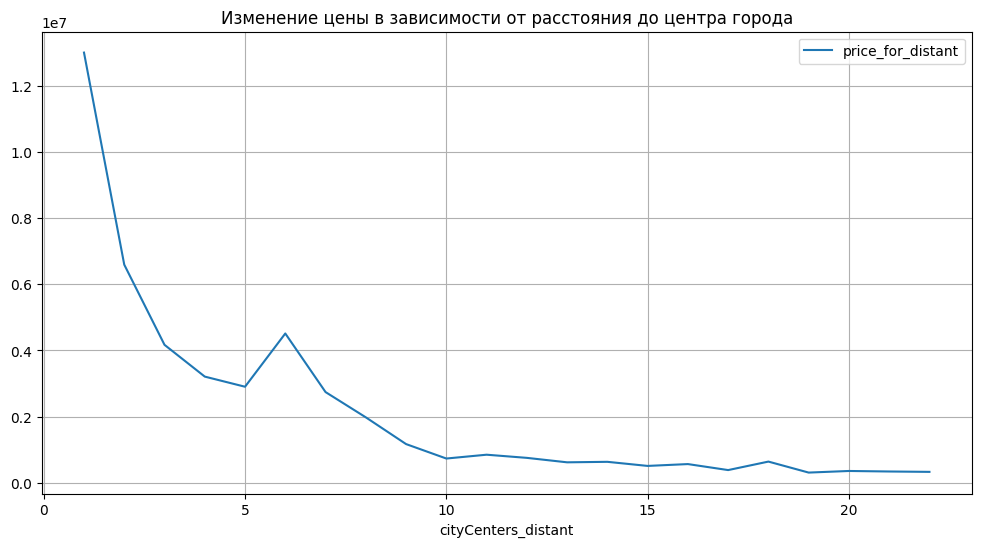

In [120]:
pivot_distance_price_2.plot(grid = True, figsize = (12,6),  title = 'Изменение цены в зависимости от расстояния до центра города');

**Вывод:** Для группы 1 самая высокая стоимость километра равняется 8 255 000 ествественно, в квартирах которые находятся в центре города. Заметен резкий спад цены на расстоянии 5 км от центра. После 15 км до центра города, цена изменяется минимальными темпами. Можно сказать, что расстояне до центра города у таких квартир на общую цену не велико. Самая минимальная стоимость выявлена на дистанции 27 км до центра, и равняется 83 333.3. 

Для группы 2 график идентичен с графиком для группы 1. Самая высокая стоимость километра для группы 2 равняется 13 000 000. Стоит заметить что у группы 2 заметен обратный рост цены за километр на дистанции  в 6 км., после чего идет такой же резкис спад. Самая минимальная стоимость выявлена на дистанции 19 км до центра, и равняется 305 236.  


<div style="border:solid steelgreen 4px; padding: 20px; border-radius: 15px">
<h1>Итог:</h1>

>В ходе проведения работы были выполнены следующие операции:
>>- Изучена общая информация о представленном датасете
>>- Выявлены пропуски в данных в датасете
>>- Заполнены все пропущенные значения в датасете
>>- Переведены изменения типов данных значений в датасете
>>- Добавлены новые колонки в датасет для дальнейшего анализа
>>- Исследованы все основные данные, построены гистограммы и графики распределения для изучения особенностей для каждлй группы
>>- Исследовано время продажи квартир с разными показателями
>>- Выявлены основные коррелирующие с ценой характеристики квартир
>>- Определена стоимость квадратном метра жилья у 10 самых популярных локациях в объявлениях
>>- Определена стоимость каждого километра до центра Санкт-Петербурга
   
 
>Результатом первичного просмотра данных были обнаружены значительные пропуски в колонках ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. В некоторых случаях, данные пропуски достигали больше половины от всего количетсва данных в датасете. Все пропущенные значения были заменены медианным значением, или на булевое значение False. Так же большенство значений было переведено из типа данных float в int для упрощения прочтения данных.
   Были удалены неявные дубликаты из колонки locality_name.

> Итоговая длинна датасета была сокращена с 23 699 строчек до 23406.
Были добавлены колонки, отображающие день, месяц и год публикации объявлений, классификация по этажам и расстояние до центра города и аэрапорта, цена за квадртаный метр.

> В ходе изучения данных были сделаны следующие выводы: 
>>- **В исследуемых данных присутствует большое количество вбросов**. При этом сравнивать все данные в датасете неимеет смысла, т.к. они все сильно разнятся. **Целесообразно разделение данных по группам. Данное разделение уменьшит кол-во вбросов для каждой подгруппы данных.** Например Группа 1 это квартиры с 0(свободная планировка), 1, 2 и 3 комнатами. Группа 2 будет включать квартиры с 4, 5, 6 и 7 комнатами. Остальные группы комнат не представляют интереса в виду их малого количества.
>>- **Расчет среднего времени продажи сильно зависит от аномальных данных**. Есть квартиры, которые были в прожаде целых 1400 дней. Медианное значение равняется 91 деню. Среднее время продажи квартиры равняется 171 день. **Быстрыми продажами квартиры можно считать все те, что были проданы быстрее 43 дней (все что входит в 25% квантиль). Долгими продажами можно считать все те, что дольше 216 дней ( всё что выше 75% квантеля)**. Медианной значение для второй группы равняется 172 дня. Среднее время продажи квартиры равняется 269 дней.**Быстрыми продажами квартиры можно считать все те, что были проданы быстрее 74 дней (все что входит в 25% квантиль). Долгими продажами можно считать все те, что дольше 380 дней (всё что выше 75% квантеля).**
>>- Для группы 1 и 2 характерны общие параметры влияния на цену продажи. **На цену в основном влияет общая площадь квартиры, но корреляция не сильная, примерно 0.65**. Полностью не корелирующими факторами являются день, месяц и год публикации объявления и этаж квартиры. Слабо коррелирующими являются кол-во комнат и площадь кухни.
>>- **Cредняя цена одного квадратного метра** самого часто встречающегося города в объявлениях **для группы 1 составляет 103921.57 за 1 квадртаный метр в городе Санкт-Петербург**. **У группы 2** также самая популярная локация является **Санкт-Петербург, и средняя цена одного квадратного метра состовляет 100160.26.**Было выявлено, что **цена за квадратный метр у многокомнатных квартир (4 и выше) меньше чем у стандартных квартир (1, 2, 3 комнаты)**. 
>>- **Для группы 1 самая высокая стоимость километра равняется 8 255 000**, ествественно, в квартирах которые находятся в центре города. Заметен резкий спад цены на расстоянии 5 км от центра. После 15 км до центра города, цена изменяется минимальными темпами. Можно сказать, что расстояне до центра города у таких квартир на общую цену не велико. **Самая минимальная стоимость выявлена на дистанции 27 км до центра, и равняется 83 333.3.** Для группы 2 график идентичен с графиком для группы 1. **Самая высокая стоимость километра для группы 2 равняется 13 000 000.** Стоит заметить что у группы 2 заметен обратный рост цены за километр на дистанции  в 6 км., после чего идет такой же резкис спад.**Самая минимальная стоимость выявлена на дистанции 19 км до центра, и равняется 305 236.** 
    
    
>Обобщая ход исследования необходимо отметить, что исследование производилось в несбалансированной выборке данных.Т.е. количество 1, 2 и 3 комнатных квартир полностью перекрывало данные об остальных. В связи с чем, вся информация о подобных квартирах ( не о 1, 2 и 3 комнатных) становилась вбросовым значением/аномальным при изучении всего датасета в целом. Так же после разделения на отдельные группы в зависимости от количества данных, инофрмации о квартирах с 8 и более комнатами было недостаточно для проведения исследования для данной группы.

>Рекомендации по ведению базы данных:
>>Для более подробного ведения базы данных рекомендую разделить датасет на несколько, что бы разграничить стандартные квартиры (1,2 и 3 комнаты) от нестандартных (4 и больше).
</div>